<a href="https://colab.research.google.com/github/alfredamboka/FinalYearProject/blob/main/mainProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization
- Authontication and Module loads

In [2]:
import ee
# ee.Authenticate()
ee.Initialize()


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=upgMedBnRTFI_wLLOOTTM5OXUcGR_iG4KX9NsAgaWIE&tc=j7nTZVLtTY7D7_4nWVXkXo0PM2kTvpyeRGCYmim-T1A&cc=VaOzGUNvlTUwnH4tujWN1SnptZzzUN3ewWkLIdg2Qaw

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1Adeu5BWd9poW7ahZYynOE4bzjqvqQaU_Izcy7FwjyTPRlAGFvEAIVGblmNE

Successfully saved authorization token.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#installation modules
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.4 MB/s eta 0:00:00


install and import geemap for convertion on js to py
Only applicable to Colab. In other cases or environment install normally and comment the cell below.

In [5]:
try:
    import geemap
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print('geemap not found, installing via pip in Google Colab...')
        !pip install geemap --quiet
        import geemap
    else:
        print('geemap not found, please install via conda in your environment')

Map = geemap.Map()


geemap not found, installing via pip in Google Colab...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.4 MB/s eta 0:00:00


important geometries for study localization

In [6]:
# Define study area
study_area = ee.FeatureCollection('projects/project5yr/assets/BuraStudyArea').geometry()

cropland = ee.FeatureCollection('projects/project5yr/assets/Croplands')#.geometry()


##J.S - P.y
Code to automatically convert GEE code from JavaScript to Python
- The cell below is used.
- Any js code provided will be converted to python.
- Write python code and js code in different cells

In [ ]:
javascript_code = """
// Series of strings here!

"""

In [ ]:
lines = geemap.js_snippet_to_py(
    javascript_code, add_new_cell=False,
    import_ee=True, import_geemap=True, show_map=True)
for line in lines:
    print(line.rstrip())

import ee
import geemap
Map = geemap.Map()
import geemap

Map = geemap.Map()

# Series of strings here!

Map


## Datasets
- Load all the required dataset in this section.


In [7]:
#Imagery and filter based on growing for the two seasons.


# Function to mask clouds using the Sentinel-2 QA band
def maskClouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).divide(10000)

# Function to calculate NDVI
def calculateNDVI(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# Load Sentinel-2 image collection and apply cloud masking
s2_collection = ee.ImageCollection('COPERNICUS/S2_SR').filterDate('2018-01-01', '2022-12-31').filterBounds(cropland).map(maskClouds)


Fused Dataset

In [8]:

# Function to mask clouds in Sentinel-2 images
def maskCloudsSentinel(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Filter Sentinel-2 images and apply cloud masking
sentinel = ee.ImageCollection("COPERNICUS/S2_SR") \
    .filterBounds(study_area) \
    .filterDate('2018-01-01', '2022-12-31') \
    .map(maskCloudsSentinel)


# Function to mask clouds in Landsat images
def maskCloudsLandsat(image):
    qa = image.select('pixel_qa')
    clear_mask = 1 << 1
    water_mask = 1 << 2
    shadow_mask = 1 << 3
    snow_mask = 1 << 4
    cloud_mask = 1 << 5
    mask = qa.bitwiseAnd(clear_mask).And(qa.bitwiseAnd(water_mask).eq(0)) \
              .And(qa.bitwiseAnd(shadow_mask).eq(0)).And(qa.bitwiseAnd(snow_mask).eq(0)) \
              .And(qa.bitwiseAnd(cloud_mask).eq(0))
    return image.updateMask(mask)

# Filter Sentinel-2 images
sentinel = ee.ImageCollection("COPERNICUS/S2_SR") \
    .filterBounds(study_area) \
    .filterDate('2018-01-01', '2022-12-31') \
    .map(maskClouds)

# Filter Landsat images and apply cloud masking
landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
    .filterBounds(study_area) \
    .filterDate('2018-01-01', '2022-12-31') \
    .map(maskCloudsLandsat)

# Filter MODIS images
modis = ee.ImageCollection("MODIS/061/MOD13Q1") \
    .filterBounds(study_area) \
    .filterDate('2018-01-01', '2022-12-31')

# Resample Landsat and MODIS to 10m resolution
landsat_resampled = landsat \
    .reduce(ee.Reducer.mean()) \
    .reproject(crs='EPSG:4326', scale=10)

modis_resampled = modis \
    .reduce(ee.Reducer.mean()) \
    .reproject(crs='EPSG:4326', scale=10)

# Merge the datasets
merged_collection = sentinel.merge(landsat_resampled).merge(modis_resampled)

# Function to add NDVI, VHI, SMCI, EVI, GNDVI, SAVI, SR, EDI, TCI, MSAVI, MNDWI, VCI, and TCI indices
def addIndices(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    vhi = image.expression('(B8 - B11) / (B8 + B11)', {'B8': image.select('B8'), 'B11': image.select('B11')}).rename('VHI')
    smci = image.expression('(B8 - B12) / (B8 + B12)', {'B8': image.select('B8'), 'B12': image.select('B12')}).rename('SMCI')
    evi = image.expression('2.5 * (B8 - B4) / (B8 + 6 * B4 - 7.5 * B2 + 1)', {'B8': image.select('B8'), 'B4': image.select('B4'), 'B2': image.select('B2')}).rename('EVI')
    gndvi = image.normalizedDifference(['B8', 'B3']).rename('GNDVI')
    savi = image.expression('(1 + 0.5) * (B8 - B4) / (B8 + B4 + 0.5)', {'B8': image.select('B8'), 'B4': image.select('B4')}).rename('SAVI')
    sr = image.expression('(B8 - B4) / (B8 + B4)', {'B8': image.select('B8'), 'B4': image.select('B4')}).rename('SR')
    edi = image.expression('(B8 - B5) / (B8 + B5)', {'B8': image.select('B8'), 'B5': image.select('B5')}).rename('EDI')
    tci = image.expression('(B8 - B6) / (B8 + B6)', {'B8': image.select('B8'), 'B6': image.select('B6')}).rename('TCI')

    # Add MSAVI (Modified Soil-Adjusted Vegetation Index)
    msavi = image.expression('(2 * B8 + 1 - sqrt((2 * B8 + 1) ** 2 - 8 * (B8 - B4))) / 2', {'B8': image.select('B8'), 'B4': image.select('B4')}).rename('MSAVI')

    # Add MNDWI (Modified Normalized Difference Water Index)
    mndwi = image.normalizedDifference(['B3', 'B11']).rename('MNDWI')

    # Add VCI (Vegetation Condition Index)
    vci = image.expression('(NDVI - NDVI_min) / (NDVI_max - NDVI_min)', {
        'NDVI': ndvi,
        'NDVI_min': ndvi.reduceRegion(reducer=ee.Reducer.min()).get('NDVI'),
        'NDVI_max': ndvi.reduceRegion(reducer=ee.Reducer.max()).get('NDVI')
    }).rename('VCI')

    return image.addBands([ndvi, vhi, smci, evi, gndvi, savi, sr, edi, tci, msavi, mndwi, vci])

# Apply the index function to the collection
merged_collection_with_indices = merged_collection.map(addIndices)

collection2 = merged_collection_with_indices

# # Function to calculate mean NDVI for the period 2018 to 2019
# mean_ndvi_2018_2019 = merged_collection_with_indices \
#     .filterDate('2018-01-01', '2019-12-31') \
#     .select('NDVI') \
#     .mean()

# # Export the mean NDVI to Google Drive
# task = ee.batch.Export.image.toDrive(
#     image=mean_ndvi_2018_2019,
#     description='fused_mean_ndvi_2018_2019',
#     folder='ProjectOutputs2',
#     scale=10,
#     region=study_area.getInfo()['coordinates'],
# )
# task.start()


Climate related dataset - ERA5 daily dataset

In [ ]:
#consisting of incoming radiation, windspeed, Temperature, humidity, Precipitation, vapour pressure etc.



## Crop Phenology Extraction
- Used to determine the growing seasons
- Also used to aid in futher data filtering.




Extraction ofcrop phenlogical periods usng NDVI and EVI Curves Image fusion of sentinel and Modis used.


Only EVI curve using fused sentinel and MODIS Data.superimposed graphs  at two years interval for proper visualization


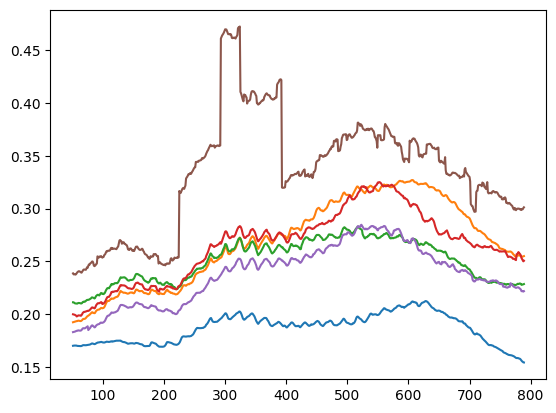

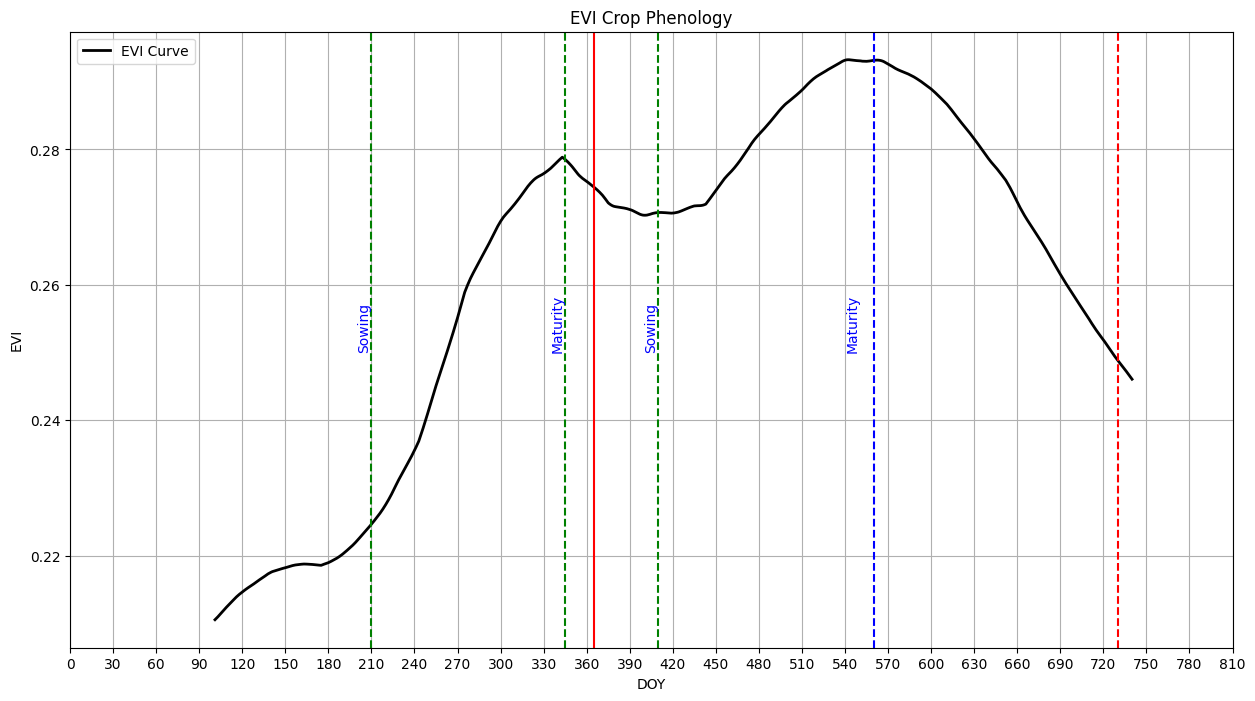

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of years from 2018 to 2022
years = range(2017, 2023)

# Create empty lists to store the mean values for each year
evi_mean_values = []

# Create an empty DataFrame to store all EVI values
all_evi_df = pd.DataFrame()

# Iterate over each year
for year in years:
    # Define start and end dates for the current year
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'

    # Load Sentinel-2, Landsat, and MODIS images for the current year
    sentinel = ee.ImageCollection('COPERNICUS/S2_SR') \
        .filterBounds(study_area) \
        .filterDate(start_date, end_date) \
        .map(lambda image: image.clip(study_area)) \
        .map(lambda image: image.updateMask(image.select(['QA60']).bitwiseAnd(2 ** 10).eq(0))) \
        .map(lambda image: image.divide(10000).float()) \
        .map(lambda image: image.expression('2.5 * (b("B8") - b("B4")) / (1 + b("B8") + 6 * b("B4") - 7.5 * b("B2"))', {
            'B2': image.select('B2'),
            'B4': image.select('B4'),
            'B8': image.select('B8')
        }).rename('EVI').copyProperties(image, image.propertyNames()))

    landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
        .filterBounds(study_area) \
        .filterDate(start_date, end_date) \
        .map(lambda image: image.clip(study_area)) \
        .map(lambda image: image.divide(10000).float()) \
        .map(lambda image: image.expression('2.5 * (b("B5") - b("B4")) / (1 + b("B5") + 6 * b("B4") - 7.5 * b("B2"))', {
            'B4': image.select('B4'),
            'B5': image.select('B5'),
            'B2': image.select('B2')
        }).rename('EVI').copyProperties(image, image.propertyNames()))

    modis = ee.ImageCollection('MODIS/006/MOD13A1') \
        .filterBounds(study_area) \
        .filterDate(start_date, end_date) \
        .map(lambda image: image.clip(study_area)) \
        .map(lambda image: image.divide(10000).float()) \
        .select('EVI')

    # Merge the image collections
    image_collection = sentinel.merge(landsat).merge(modis)

    # Create a fusion function
    def fusionFunction(images):
        return ee.Image(images.mean())

    # Apply the fusion function to the image collection
    fused_image = image_collection.reduce(ee.Reducer.intervalMean(50, 100)).rename('EVI')

    # Reduce region and extract EVI values as a nested list
    evi_values = fused_image.reduceRegion(reducer=ee.Reducer.toList(), geometry=study_area, scale=500).getInfo()

    # Convert the nested list to a Pandas DataFrame
    evi_df = pd.DataFrame(evi_values.get('EVI'), columns=['EVI'])

    # Add day of the year (DOY) column
    evi_df['doy'] = range(1, len(evi_df) + 1)

    # Smooth curve using moving average
    evi_df['EVI_smooth'] = evi_df['EVI'].rolling(window=100, center=True).mean()

    # Fit curve using polynomial regression
    evi_fit = np.polyfit(evi_df['doy'], evi_df['EVI_smooth'], deg=6)

    # Calculate the mean EVI value for the current year
    evi_mean = evi_df['EVI'].mean()

    # Store the mean value
    evi_mean_values.append(evi_mean)

    # Merge the current year's EVI DataFrame with the overall DataFrame
    all_evi_df = pd.concat([all_evi_df, evi_df], ignore_index=True)

    # Plot EVI curve with fitted curve for the current year
    #plt.figure(figsize=(15, 8))
    plt.plot(evi_df['doy'], evi_df['EVI_smooth'], label=f'{year-1}-{year}')

# Calculate the average EVI values across all years
avg_evi_df = all_evi_df.groupby('doy')['EVI_smooth'].mean().reset_index()

# Smooth the average EVI curve using moving average
avg_evi_df['EVI_avg_smooth'] = avg_evi_df['EVI_smooth'].rolling(window=100, center=True).mean()

# Fit curve using polynomial regression
avg_evi_fit = np.polyfit(avg_evi_df['doy'], avg_evi_df['EVI_avg_smooth'], deg=6)

# Plot the average EVI curve with the fitted curve
plt.figure(figsize=(15, 8))
plt.plot(avg_evi_df['doy'], avg_evi_df['EVI_avg_smooth'], color='black', linewidth=2, label='EVI Curve')
plt.xlabel('DOY')
plt.ylabel('EVI')
plt.title('EVI Crop Phenology')
plt.legend()
plt.grid(True)

plt.xticks(np.arange(0, len(avg_evi_df['doy']), 365))
plt.xticks(np.arange(0, len(avg_evi_df['doy']), 30))
plt.axvline(x=365, color='red', linestyle='-')
plt.axvline(x=730, color='red', linestyle='--')
plt.axvline(x=410, color='green', linestyle='--')
plt.axvline(x=345, color='green', linestyle='--')
plt.axvline(x=560, color='blue', linestyle='--')
plt.axvline(x=210, color='green', linestyle='--')
plt.text(545, 0.25, 'Maturity', color='blue', ha='center', va='bottom', rotation=90)
plt.text(205, 0.25, 'Sowing', color='blue', ha='center', va='bottom', rotation=90)
plt.text(340, 0.25, 'Maturity', color='blue', ha='center', va='bottom', rotation=90)
plt.text(405, 0.25, 'Sowing', color='blue', ha='center', va='bottom', rotation=90)
plt.axhline(y=0.25, xmin=210, xmax=410, color='orange', linestyle='--')

plt.show()



Superimposed graphs. ONLY NDVI. Showing  Crop phenology between consecutive years and an average curve.

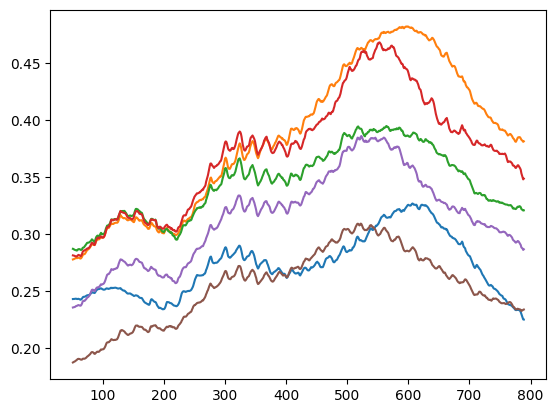

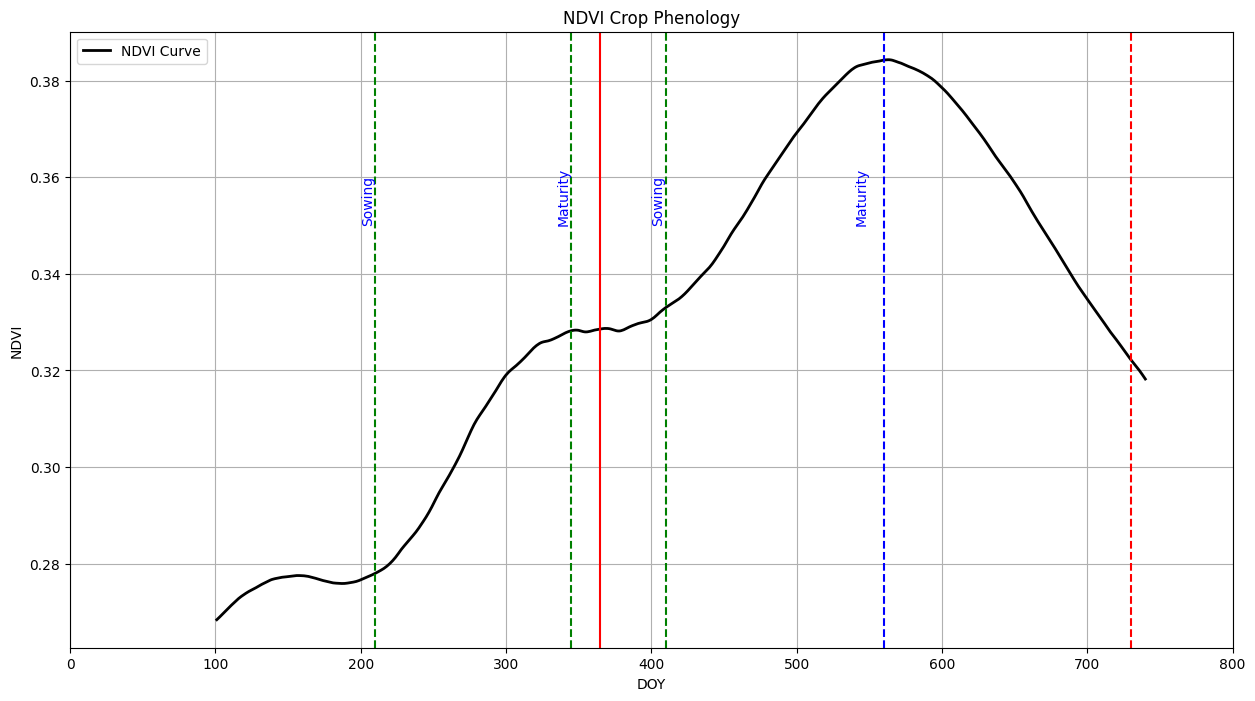

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define study area
#study_area = ee.FeatureCollection('projects/project5yr/assets/Croplands').geometry()
study_area = ee.FeatureCollection('projects/project5yr/assets/BuraStudyArea').geometry()

# Create a list of years from 2018 to 2022
years = range(2017, 2023)

# Create empty lists to store the mean values for each year
ndvi_mean_values = []

# Create an empty DataFrame to store all NDVI values
all_ndvi_df = pd.DataFrame()

# Iterate over each year
for year in years:
    # Define start and end dates for the current year
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'

    # Load Sentinel-2, Landsat, and MODIS images for the current year
    sentinel = ee.ImageCollection('COPERNICUS/S2_SR') \
        .filterBounds(study_area) \
        .filterDate(start_date, end_date) \
        .map(lambda image: image.clip(study_area)) \
        .map(lambda image: image.updateMask(image.select(['QA60']).bitwiseAnd(2 ** 10).eq(0))) \
        .map(lambda image: image.divide(10000).float()) \
        .map(lambda image: image.expression('(b("B8") - b("B4")) / (b("B8") + b("B4"))', {
            'B4': image.select('B4'),
            'B8': image.select('B8')
        }).rename('NDVI').copyProperties(image, image.propertyNames()))

    landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
        .filterBounds(study_area) \
        .filterDate(start_date, end_date) \
        .map(lambda image: image.clip(study_area)) \
        .map(lambda image: image.divide(10000).float()) \
        .map(lambda image: image.expression('(b("B5") - b("B4")) / (b("B5") + b("B4"))', {
            'B4': image.select('B4'),
            'B5': image.select('B5')
        }).rename('NDVI').copyProperties(image, image.propertyNames()))

    modis = ee.ImageCollection('MODIS/006/MOD13A1') \
        .filterBounds(study_area) \
        .filterDate(start_date, end_date) \
        .map(lambda image: image.clip(study_area)) \
        .map(lambda image: image.divide(10000).float()) \
        .select('NDVI')

    # Merge the image collections
    image_collection = sentinel.merge(landsat).merge(modis)

    # Create a fusion function
    def fusionFunction(images):
        return ee.Image(images.mean())

    # Apply the fusion function to the image collection
    fused_image = image_collection.reduce(ee.Reducer.intervalMean(50, 100)).rename('NDVI')

    # Reduce region and extract NDVI values as a nested list
    ndvi_values = fused_image.reduceRegion(reducer=ee.Reducer.toList(), geometry=study_area, scale=500).getInfo()

    # Convert the nested list to a Pandas DataFrame
    ndvi_df = pd.DataFrame(ndvi_values.get('NDVI'), columns=['NDVI'])

    # Add day of the year (DOY) column
    ndvi_df['doy'] = range(1, len(ndvi_df) + 1)

    # Smooth curve using moving average
    ndvi_df['NDVI_smooth'] = ndvi_df['NDVI'].rolling(window=100, center=True).mean()

    # Fit curve using polynomial regression
    ndvi_fit = np.polyfit(ndvi_df['doy'], ndvi_df['NDVI_smooth'], deg=6)

    # Calculate the mean NDVI value for the current year
    ndvi_mean = ndvi_df['NDVI'].mean()

    # Store the mean value
    ndvi_mean_values.append(ndvi_mean)

    # Merge the current year's NDVI DataFrame with the overall DataFrame
    all_ndvi_df = pd.concat([all_ndvi_df, ndvi_df], ignore_index=True)

    # Plot NDVI curve with fitted curve for the current year
    plt.plot(ndvi_df['doy'], ndvi_df['NDVI_smooth'], label=f'{year-1}-{year}')

# Calculate the average NDVI values across all years
avg_ndvi_df = all_ndvi_df.groupby('doy')['NDVI_smooth'].mean().reset_index()

# Smooth the average NDVI curve using moving average
avg_ndvi_df['NDVI_avg_smooth'] = avg_ndvi_df['NDVI_smooth'].rolling(window=100, center=True).mean()

# Fit curve using polynomial regression
avg_ndvi_fit = np.polyfit(avg_ndvi_df['doy'], avg_ndvi_df['NDVI_avg_smooth'], deg=6)

# Plot the average NDVI curve with the fitted curve
plt.figure(figsize=(15, 8))
plt.plot(avg_ndvi_df['doy'], avg_ndvi_df['NDVI_avg_smooth'], color='black', linewidth=2, label='NDVI Curve')
plt.xlabel('DOY')
plt.ylabel('NDVI')
plt.title('NDVI Crop Phenology')
plt.legend()
plt.grid(True)

plt.xticks(np.arange(0, len(avg_ndvi_df['doy']), 730))
plt.xticks(np.arange(0, len(avg_ndvi_df['doy']), 100))
plt.axvline(x=365, color='red', linestyle='-')
plt.axvline(x=730, color='red', linestyle='--')
plt.axvline(x=410, color='green', linestyle='--')
plt.axvline(x=345, color='green', linestyle='--')
plt.axvline(x=560, color='blue', linestyle='--')
plt.axvline(x=210, color='green', linestyle='--')
plt.text(545, 0.35, 'Maturity', color='blue', ha='center', va='bottom', rotation=90)
plt.text(205, 0.35, 'Sowing', color='blue', ha='center', va='bottom', rotation=90)
plt.text(340, 0.35, 'Maturity', color='blue', ha='center', va='bottom', rotation=90)
plt.text(405, 0.35, 'Sowing', color='blue', ha='center', va='bottom', rotation=90)
plt.axhline(y=0.35, xmin=210, xmax=410, color='orange', linestyle='--')

plt.show()

# Map = geemap.Map()
# Map.addLayer(fused_image, {'min': -1, 'max': 1, 'palette': ['red', 'yellow', 'green']}, f'NDVI {year}')
# # Display the map
# Map.setCenter( 39.876021,-1.17071,12)


---
Utilizing EVI to Identify crop phenology periods. Two years interval for proper mapping.
Superimposed curves.




---


# Yield Estimation

---



##Vegetation indices.
- In this case is NDVI which will be used for Biomass estimations.

In [ ]:
# Define the short and long season dates
short_season_start = '03-15'
short_season_end = '07-15'
long_season_start = '09-05'
long_season_end = '01-15'

# Define the years of interest
years = ['2018','2019', '2020', '2021', '2022']

# Filter by short and long seasons
short_season_collection = s2_collection.filter(ee.Filter.date('2018-' + short_season_start, '2018-' + short_season_end))
long_season_collection = s2_collection.filter(ee.Filter.date('2018-' + long_season_start, '2019-' + long_season_end))

# Generate NDVI for each season
short_season_ndvi = short_season_collection.map(calculateNDVI)
long_season_ndvi = long_season_collection.map(calculateNDVI)
combined_season_ndvi = short_season_ndvi.merge(long_season_ndvi)

# Generate NDVI maps for each year
for year in years:
    year_collection = s2_collection.filter(ee.Filter.calendarRange(int(year), int(year), 'year'))
    year_ndvi = year_collection.map(calculateNDVI)

    # Compute mean composite image for the year
    mean_composite = year_ndvi.mean().clip(cropland)

    # Add yearly mean NDVI map  to the map
    Map.addLayer(year_ndvi.select('NDVI').mean().clip(cropland), {'min': -1, 'max': 1, 'palette': ['red', 'yellow', 'green']}, 'NDVI ' + year)

    # Add mean composite image to the map
    Map.addLayer(mean_composite, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}, 'Mean Composite ' + year)

# # Display the map

#Map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In season  NDVI extraction for both short and long season.

In [ ]:
# Function to select NDVI per season per year
def selectNDVIbySeason(year_collection, start_date, end_date):
    season_collection = year_collection.filter(ee.Filter.date(start_date, end_date))
    return season_collection.select('NDVI')

# Select and add NDVI maps for each season for all years
for year in years:
    year_collection = s2_collection.filter(ee.Filter.calendarRange(int(year), int(year), 'year'))
    year_ndvi = year_collection.map(calculateNDVI)

    # Short season NDVI
    short_season_ndvi_year = selectNDVIbySeason(year_ndvi, year + '-' + short_season_start, year + '-' + short_season_end)
    Map.addLayer(short_season_ndvi_year.mean().clip(cropland), {'min': -1, 'max': 1, 'palette': ['red', 'yellow', 'green']}, 'Short Season NDVI ' + year)

    # Long season NDVI
    long_season_ndvi_year = selectNDVIbySeason(year_ndvi, year + '-' + long_season_start, str(int(year)+1) + '-' + long_season_end)
    Map.addLayer(long_season_ndvi_year.mean().clip(cropland), {'min': -1, 'max': 1, 'palette': ['red', 'yellow', 'green']}, 'Long Season NDVI ' + year)

# Display the map
#Map


Export NDVI maps to drive.

In [ ]:

# # Function to calculate NDVI
# def calculateNDVI(image):
#     return image.normalizedDifference(['B8', 'B4'])

# # Function to export the image to Google Drive
# def export_to_drive(image, name, folder):
#     task = ee.batch.Export.image.toDrive(
#         image=image,
#         description=name,
#         folder=folder,
#         fileNamePrefix=name,
#         region=cropland,  # Export around the study area polygon
#         scale=10,  # Adjust the scale as needed
#         maxPixels=int(1e13)  # Set a limit on the number of pixels for large areas
#     )
#     task.start()

# # Iterate through each year and export each season to Google Drive
# for year in years:
#     # Filter by short and long seasons for the current year
#     short_season_collection = s2_collection.filter(ee.Filter.date(year + '-' + short_season_start, year + '-' + short_season_end)).filterBounds(cropland)
#     long_season_collection = s2_collection.filter(ee.Filter.date(year + '-' + long_season_start, str(int(year) + 1) + '-' + long_season_end)).filterBounds(cropland)

#     # Generate NDVI for each season
#     short_season_ndvi = short_season_collection.map(calculateNDVI)
#     long_season_ndvi = long_season_collection.map(calculateNDVI)

#     # Merge the short and long season NDVI collections
#     combined_season_ndvi = short_season_ndvi.merge(long_season_ndvi)

#     # Calculate the median NDVI for each season
#     short_season_median = short_season_ndvi.median()
#     long_season_median = long_season_ndvi.median()
#     combined_season_median = combined_season_ndvi.median()

#     # Select only the NDVI bands for export
#     short_season_median_ndvi = short_season_median.select(['nd'])
#     long_season_median_ndvi = long_season_median.select(['nd'])
#     combined_season_median_ndvi = combined_season_median.select(['nd'])

#     # Export the median NDVI images for each season
#     export_to_drive(short_season_median_ndvi, 'Short_Season_NDVI_' + year,'ProjectOutputs' )
#     export_to_drive(long_season_median_ndvi, 'Long_Season_NDVI_' + year ,'ProjectOutputs')
#     export_to_drive(combined_season_median_ndvi, 'Combined_Season_NDVI_' + year, 'ProjectOutputs')


##Biomass
- Biomass = 0.864 x LUE x APAR

###APAR - 24h Absorbed Photosynthetically  Active Radiation
APAR = 0.48 x f x s (s- incoming solar Radiation, f- fraction of APAR)

####Incoming solar Radiation (s)
- This code is applicable in filtering variety of climate variables including reinfall,precipitation, vapour pressure, wind speed. By replacing the needed band and results are obtained.

In [ ]:
#Calculations of APAR based on following components
#ECMWF/ERA5_LAND/DAILY_AGGR - Data soure in GEE.
#shortwave downward flux is used

# Define the date ranges for short season and long season
short_season_start = '03-15'
short_season_end = '07-15'
long_season_start = '09-15'
long_season_end = '01-15'

# Function to calculate mean incoming solar radiation for a given season
def calculate_seasonal_solar_radiation(year, start_date, end_date):
    start_date = f"{year}-{start_date}"
    end_date = f"{year}-{end_date}"

    # Filter the ERA5 Daily aggregated data
    filtered_data = (ee.ImageCollection('ECMWF/ERA5_LAND/DAILY_AGGR')
                     .filter(ee.Filter.date(start_date, end_date))
                     .select(['temperature_2m_min', 'temperature_2m_max', 'temperature_2m',
                              'surface_solar_radiation_downwards_sum', 'u_component_of_wind_10m',
                              'v_component_of_wind_10m', 'total_precipitation_sum'])
                     .filterBounds(cropland))

    # Calculate mean solar radiation for the season
    solar_radiation_mean = filtered_data.select('surface_solar_radiation_downwards_sum').mean()

    return solar_radiation_mean

# Function to calculate mean incoming solar radiation for short season and long season for each year
def calculate_mean_solar_radiation_for_year(year):
    short_season_radiation = calculate_seasonal_solar_radiation(year, short_season_start, short_season_end)
    long_season_radiation = calculate_seasonal_solar_radiation(year, long_season_start, long_season_end)
    combined_radiation = calculate_seasonal_solar_radiation(year, '01-01', '12-31')  # Whole year

    return {
        'short_season': short_season_radiation,
        'long_season': long_season_radiation,
        'combined_season': combined_radiation
    }

# Main function to calculate mean solar radiation for all years
def main():
    years = [2018, 2019, 2020, 2021, 2022]
    results = {}
    for year in years:
        results[year] = calculate_mean_solar_radiation_for_year(year)

    # Print or return the results dictionary
    print(results)
    return results

if __name__ == "__main__":
    main()


#access specific season in specific year


{2018: {'short_season': <ee.image.Image object at 0x7db20516c670>, 'long_season': <ee.image.Image object at 0x7db20516c9d0>, 'combined_season': <ee.image.Image object at 0x7db20516d7b0>}, 2019: {'short_season': <ee.image.Image object at 0x7db20515bca0>, 'long_season': <ee.image.Image object at 0x7db20515ad40>, 'combined_season': <ee.image.Image object at 0x7db20516e2f0>}, 2020: {'short_season': <ee.image.Image object at 0x7db20516ee00>, 'long_season': <ee.image.Image object at 0x7db20516f820>, 'combined_season': <ee.image.Image object at 0x7db2051742e0>}, 2021: {'short_season': <ee.image.Image object at 0x7db205174d60>, 'long_season': <ee.image.Image object at 0x7db2051757e0>, 'combined_season': <ee.image.Image object at 0x7db205176260>}, 2022: {'short_season': <ee.image.Image object at 0x7db205176830>, 'long_season': <ee.image.Image object at 0x7db205176e60>, 'combined_season': <ee.image.Image object at 0x7db2051777c0>}}


View the above on map

In [ ]:
#display on map - in this case tested with shortseason.
def mega():
    years = [2018, 2019, 2020, 2021, 2022]
    mapresults = {}
    for year in years:
        mapresults[year] = calculate_mean_solar_radiation_for_year(year)

        # Visualize the short season results for each year
        short_season_img = mapresults[year]['short_season']
        short_season_viz_params = {
            'min': 0,
            'max': 8000,
             'palette': ['blue', 'green', 'yellow', 'red']
        }
        short_season_layer_name = f'Short Season Radiation {year}'
        Map.addLayer(short_season_img.clip(cropland), short_season_viz_params, short_season_layer_name)

    # Print or return the results dictionary
    print(mapresults)
    return mapresults

if __name__ == "__main__":
    mega()
#Map

{2018: {'short_season': <ee.image.Image object at 0x7db20516f550>, 'long_season': <ee.image.Image object at 0x7db20516d990>, 'combined_season': <ee.image.Image object at 0x7db20516cfd0>}, 2019: {'short_season': <ee.image.Image object at 0x7db1c5bcec50>, 'long_season': <ee.image.Image object at 0x7db1c5bccc40>, 'combined_season': <ee.image.Image object at 0x7db205124730>}, 2020: {'short_season': <ee.image.Image object at 0x7db20515ad40>, 'long_season': <ee.image.Image object at 0x7db2051773a0>, 'combined_season': <ee.image.Image object at 0x7db205175f00>}, 2021: {'short_season': <ee.image.Image object at 0x7db205176740>, 'long_season': <ee.image.Image object at 0x7db205175f30>, 'combined_season': <ee.image.Image object at 0x7db205175630>}, 2022: {'short_season': <ee.image.Image object at 0x7db205177c40>, 'long_season': <ee.image.Image object at 0x7db205174c70>, 'combined_season': <ee.image.Image object at 0x7db205126b60>}}


####Fraction of APAR (f)
- f = -0.161 + 1.257NDVI

- Calculation done based on the NDVI value for each season and combined seasons per year.

In [ ]:
#
# Function to calculate APAR_Fractrion from NDVI
def calculateAPARFraction(image):
    ndvi = image.select('NDVI')
    apar_fraction = ndvi.expression('-0.161 + 1.257 * ndvi', {'ndvi': ndvi})
    return image.addBands(apar_fraction.rename('APAR_Fractrion'))

# Function to calculate NDVI and apply APAR_Fractrion function for each year
def calculateNDVIandAPAR(year):
    year_collection = s2_collection.filter(ee.Filter.calendarRange(int(year), int(year), 'year'))
    year_ndvi = year_collection.map(calculateNDVI)
    year_apar = year_ndvi.map(calculateAPARFraction)
    return year_apar

# Calculate APAR_Fractrion for short season for each year
short_season_apar_years = [calculateNDVIandAPAR(year) for year in years]

# Calculate APAR_Fractrion for long season for each year
long_season_apar_years = [calculateNDVIandAPAR(year) for year in years]

# Calculate APAR_Fractrion for combined season (concatenate short and long seasons) for each year
combined_season_ndvi_years = [short_season_apar_years[i].merge(long_season_apar_years[i]) for i in range(len(years))]
combined_season_apar_years = [combined_season_ndvi_years[i].map(calculateAPARFraction) for i in range(len(years))]


In [ ]:
# Convert the ImageCollections to a list for each year
short_season_apar_list = [short_season_apar_years[i].toList(short_season_apar_years[i].size()) for i in range(len(years))]
long_season_apar_list = [long_season_apar_years[i].toList(long_season_apar_years[i].size()) for i in range(len(years))]
combined_season_apar_list = [combined_season_apar_years[i].toList(combined_season_apar_years[i].size()) for i in range(len(years))]

# Loop through each year, extract the images from the lists, and add them to the map
for i, year in enumerate(years):
    # Get the ImageCollections for each year
    short_season_apar_i = ee.ImageCollection(short_season_apar_list[i])
    long_season_apar_i = ee.ImageCollection(long_season_apar_list[i])
    combined_season_apar_i = ee.ImageCollection(combined_season_apar_list[i])

    # Mosaic the bands into a single image
    short_season_apar_mosaic = short_season_apar_i.mean().select(['APAR_Fractrion'])
    long_season_apar_mosaic = long_season_apar_i.mean().select(['APAR_Fractrion'])
    combined_season_apar_mosaic = combined_season_apar_i.mean().select(['APAR_Fractrion'])

    # Add layers to the map and apply the palette
    Map.addLayer(short_season_apar_mosaic, {'min': -0.1, 'max': 1.0, 'palette': ['red', 'yellow', 'green']}, 'Short Season APAR ' + year)
    Map.addLayer(long_season_apar_mosaic, {'min': -0.1, 'max': 1.0, 'palette': ['red', 'yellow', 'green']}, 'Long Season APAR ' + year)
    Map.addLayer(combined_season_apar_mosaic, {'min': -0.1, 'max': 1.0, 'palette': ['red', 'yellow', 'green']}, 'Combined Season APAR ' + year)
#Map

####Bundle APAR results
- Obtained using APAR expression 0.48 x f x s.

In [ ]:
#
# Function to calculate APAR from NDVI and mean incoming solar radiation
def calculateAPAR(image, solar_radiation):
    apar_fraction = image.select('APAR_Fractrion')
    apar = apar_fraction.expression('0.48 * s * f', {'s': solar_radiation, 'f': apar_fraction})
    return image.addBands(apar.rename('APAR'))

# Function to calculate NDVI, apply APAR_Fractrion function, and calculate APAR for each year
def calculateNDVIandAPAR(year):
    year_collection = s2_collection.filter(ee.Filter.calendarRange(int(year), int(year), 'year'))
    year_ndvi = year_collection.map(calculateNDVI)
    year_apar_fraction = year_ndvi.map(calculateAPARFraction)

    # Calculate mean solar radiation for the year
    solar_radiation_info = calculate_mean_solar_radiation_for_year(int(year))
    short_season_radiation = solar_radiation_info['short_season']
    combined_season_radiation = solar_radiation_info['combined_season']

    # Filter long season data for the specific year
    long_season_start_date = '{}-{}'.format(year, long_season_start)
    long_season_end_date = '{}-{}'.format(int(year) + 1, long_season_end)
    long_season_apar = year_apar_fraction.filter(ee.Filter.date(long_season_start_date, long_season_end_date))
    long_season_apar = long_season_apar.map(lambda img: calculateAPAR(img, combined_season_radiation))

    # Calculate APAR for short season
    short_season_apar = year_apar_fraction.filter(ee.Filter.date('{}-{}'.format(year, short_season_start), '{}-{}'.format(year, short_season_end)))
    short_season_apar = short_season_apar.map(lambda img: calculateAPAR(img, short_season_radiation))

    # Calculate APAR for combined season (concatenate short and long seasons)
    combined_season_apar = short_season_apar.merge(long_season_apar)

    return {
        'year': year,
        'short_season': short_season_apar,
        'long_season': long_season_apar,
        'combined_season': combined_season_apar
    }


# Main function to calculate APAR for all years
def calculate_APAR_for_all_years():
    years = ['2018', '2019', '2020', '2021', '2022']
    results = {}
    for year in years:
        results[year] = calculateNDVIandAPAR(year)

    # Print or return the results dictionary
    print(results)
    return results


if __name__ == "__main__":
    # Calculate APAR for all years and store the results in the 'results' dictionary
    results = calculate_APAR_for_all_years()



{'2018': {'year': '2018', 'short_season': <ee.imagecollection.ImageCollection object at 0x7db205191540>, 'long_season': <ee.imagecollection.ImageCollection object at 0x7db205124490>, 'combined_season': <ee.imagecollection.ImageCollection object at 0x7db205193fa0>}, '2019': {'year': '2019', 'short_season': <ee.imagecollection.ImageCollection object at 0x7db2051d4d60>, 'long_season': <ee.imagecollection.ImageCollection object at 0x7db20516d2d0>, 'combined_season': <ee.imagecollection.ImageCollection object at 0x7db2051d4f70>}, '2020': {'year': '2020', 'short_season': <ee.imagecollection.ImageCollection object at 0x7db2051d7af0>, 'long_season': <ee.imagecollection.ImageCollection object at 0x7db2051d7280>, 'combined_season': <ee.imagecollection.ImageCollection object at 0x7db2051d7b80>}, '2021': {'year': '2021', 'short_season': <ee.imagecollection.ImageCollection object at 0x7db2051ea560>, 'long_season': <ee.imagecollection.ImageCollection object at 0x7db2051e9d20>, 'combined_season': <ee

Vizualize APAR

In [ ]:
#
# Main function to calculate APAR for all years
def calculate_APAR_for_all_years():
    years = ['2018', '2019', '2020', '2021', '2022']
    results = {}
    for year in years:
        results[year] = calculateNDVIandAPAR(year)

        # Get APAR images for each season
        short_season_apar = results[year]['short_season']
        long_season_apar = results[year]['long_season']
        combined_season_apar = results[year]['combined_season']

        # Add APAR images to the map

        #Map.centerObject(short_season_apar, 12)
        vis_params = {'min': 0, 'max': 500}  # Adjust the visualization parameters as needed
        Map.addLayer(short_season_apar.filterBounds(cropland), vis_params, 'Short Season APAR - ' + year)
        Map.addLayer(long_season_apar.filterBounds(cropland), vis_params, 'Long Season APAR - ' + year)
        Map.addLayer(combined_season_apar.filterBounds(cropland), vis_params, 'Combined Season APAR - ' + year)

        # Save the map as an HTML file
        output_file = f'APAR_{year}.html'
        Map.to_html(output_file)

    return results

# Run the function to calculate APAR for all years and visualize the results
calculate_APAR_for_all_years()
#Map

{'2018': {'year': '2018',
  'short_season': <ee.imagecollection.ImageCollection at 0x7db2051e4280>,
  'long_season': <ee.imagecollection.ImageCollection at 0x7db2051e64a0>,
  'combined_season': <ee.imagecollection.ImageCollection at 0x7db2051e69e0>},
 '2019': {'year': '2019',
  'short_season': <ee.imagecollection.ImageCollection at 0x7db2051e59c0>,
  'long_season': <ee.imagecollection.ImageCollection at 0x7db2051e73a0>,
  'combined_season': <ee.imagecollection.ImageCollection at 0x7db2051e5a80>},
 '2020': {'year': '2020',
  'short_season': <ee.imagecollection.ImageCollection at 0x7db205023d90>,
  'long_season': <ee.imagecollection.ImageCollection at 0x7db205035c60>,
  'combined_season': <ee.imagecollection.ImageCollection at 0x7db2050236d0>},
 '2021': {'year': '2021',
  'short_season': <ee.imagecollection.ImageCollection at 0x7db205036d40>,
  'long_season': <ee.imagecollection.ImageCollection at 0x7db205037520>,
  'combined_season': <ee.imagecollection.ImageCollection at 0x7db205036ec0

##LUE - Ligth Use efficiency
- Obtained using the expresion <br>
ε = ε_max * g(T) * g(D) * λ
-[ ] ε_max for maize is approximately 2.5 (g/MJ)
-[ ] g(T) represent heat stress
-[ ] λ represent evaporative fraction.
-[ ] Water stress


--

- Also can be calculated as shown:
LUE = GPP_max/APAR

- In this case, EC-LUE model is used for LUE determination.




In [ ]:

s2_collection_ndvi = s2_collection.map(calculateNDVI)

# Define years
years = ['2018', '2019', '2020', '2021', '2022']

# Function to calculate APAR using APAR_Fractrion
def calculateAPAR(image):
    apar_fraction = image.select('APAR_Fractrion')
    apar = apar_fraction.multiply(0.858).rename('APAR')  # PAR = 858 µmol/m²/s for Sentinel-2 (assuming 0.5 conversion factor from NDVI to PAR)
    return image.addBands(apar)

# Function to estimate Light Use Efficiency (LUE) using EC-LUE model
def estimateLUE(image):
    ndvi = image.select('NDVI')

    # EC-LUE model parameters
    alpha = 0.4   # Quantum yield (maximum LUE), typically ranges from 0.3 to 0.5 mol C/mol PAR
    beta = 0.9    # Light use efficiency parameter, typically ranges from 0.8 to 1.2
    k = 0.5       # Extinction coefficient, typically ranges from 0.4 to 0.6

    # Calculate LUE using the EC-LUE model
    lue = ndvi.multiply(alpha).divide(ndvi.add(k).multiply(beta))

    return image.addBands(lue.rename('LUE'))


# Function to calculate NDVI and apply APAR_Fractrion function for each year
def calculateNDVIandAPAR(year):
    year_collection = s2_collection.filter(ee.Filter.calendarRange(int(year), int(year), 'year'))
    year_ndvi = year_collection.map(calculateNDVI)
    year_apar = year_ndvi.map(calculateAPARFraction)
    return year_apar

# Calculate APAR_Fractrion for short season for each year
short_season_ndvi_years = [calculateNDVIandAPAR(year) for year in years]

# Calculate APAR_Fractrion for long season for each year
long_season_ndvi_years = [calculateNDVIandAPAR(year) for year in years]

# Calculate APAR_Fractrion for combined season (concatenate short and long seasons) for each year
combined_season_ndvi_years = [short_season_ndvi_years[i].merge(long_season_ndvi_years[i]) for i in range(len(years))]

# Calculate APAR for short season for each year
short_season_apar_years = [short_season_ndvi_years[i].map(calculateAPAR) for i in range(len(years))]

# Calculate APAR for long season for each year
long_season_apar_years = [long_season_ndvi_years[i].map(calculateAPAR) for i in range(len(years))]

# Calculate APAR for combined season for each year
combined_season_apar_years = [combined_season_ndvi_years[i].map(calculateAPAR) for i in range(len(years))]

# Calculate LUE for short season for each year
short_season_lue_years = [short_season_apar_years[i].map(estimateLUE) for i in range(len(years))]

# Calculate LUE for long season for each year
long_season_lue_years = [long_season_apar_years[i].map(estimateLUE) for i in range(len(years))]

# Calculate LUE for combined season for each year
combined_season_lue_years = [combined_season_apar_years[i].map(estimateLUE) for i in range(len(years))]


Visualize LUE on map

In [ ]:
# Visualization parameters for LUE bands
lue_vis_params = {
    'min': 0,
    'max': 1,
    'palette': ['blue', 'green', 'yellow', 'red']
}

# Add LUE data for short season to the map
for i, year in enumerate(years):
    Map.addLayer(short_season_lue_years[i].select('LUE').filterBounds(cropland), lue_vis_params, f'Short Season LUE - {year}')

# Add LUE data for long season to the map
for i, year in enumerate(years):
    Map.addLayer(long_season_lue_years[i].select('LUE').filterBounds(cropland), lue_vis_params, f'Long Season LUE - {year}')

# Add LUE data for combined season to the map
for i, year in enumerate(years):
    Map.addLayer(combined_season_lue_years[i].select('LUE').filterBounds(cropland), lue_vis_params, f'Combined Season LUE - {year}')


# # Display the map
# Map


###Bundle Everythig to Biomass
- Biomass = ( 0.864 x lue x APAR )

In [ ]:
#
# Function to calculate Biomass
def calculateBiomass(image):
    apar = image.select('APAR')
    lue = image.select('LUE')
    biomass = apar.multiply(lue).multiply(0.864).rename('Biomass')
    return image.addBands(biomass)

# Calculate Biomass for short season for each year
short_season_biomass_years = [short_season_lue_years[i].map(calculateBiomass) for i in range(len(years))]

# Calculate Biomass for long season for each year
long_season_biomass_years = [long_season_lue_years[i].map(calculateBiomass) for i in range(len(years))]

# Calculate Biomass for combined season for each year
combined_season_biomass_years = [combined_season_lue_years[i].map(calculateBiomass) for i in range(len(years))]

# Function to clip image to the defined cropland polygon
def clipToCropland(image):
    return image.clip(cropland)

# Clip Biomass images to cropland polygon for each year and season
short_season_biomass_clipped_years = [short_season_biomass_years[i].map(clipToCropland) for i in range(len(years))]
long_season_biomass_clipped_years = [long_season_biomass_years[i].map(clipToCropland) for i in range(len(years))]
combined_season_biomass_clipped_years = [combined_season_biomass_years[i].map(clipToCropland) for i in range(len(years))]



Visualize Biomass on Map

In [ ]:
# Visualization parameters for Biomass bands
Biomass_vis_params = {
    'min': 0,
    'max': 1,
    'palette': ['orange', 'green', 'yellow', 'blue']
}

# Add Biomass data for short season to the map
for i, year in enumerate(years):
    Map.addLayer(short_season_biomass_clipped_years[i].select('Biomass'), Biomass_vis_params, f'Short Season Biom - {year}')

# Add Biomass data for long season to the map
for i, year in enumerate(years):
    Map.addLayer(long_season_biomass_clipped_years[i].select('Biomass'), Biomass_vis_params, f'Long Season  Biom - {year}')

# Add Biomass data for combined season to the map
for i, year in enumerate(years):
    Map.addLayer(combined_season_biomass_clipped_years[i].select('Biomass'),Biomass_vis_params, f'Combined Season  Biom - {year}')


# # Display the map
# Map


## Harvest Index (HI)
- Required for yeild estimation and is obtained as (Ymean/Biomass) ---- Y= Yields
-[Reference Maize HI](https://doi.org/10.1016/j.fcr.2023.108991)

In [ ]:
# for the time being, a stardard HI index used in ASAL irrigated environment will be adopted
# Onces Yield data reqested is obtained then actual value will be calculate for whole region
# but for plot based, an average value will be adopted
# HI in Irrigation schemes will be btween 0.4 to 0.6 hence mean (0.5) is adopted.

HI = 0.5

##Bundled yield Calculation.
Yield = Σ(Biomass) * HI

In this equation:

    Yield represents the estimated crop yield.
    Biomass is the calculated biomass, which is a measure of the total organic material (dry weight) produced by the crop.
    HI is the Harvest Index, a crop-specific parameter that represents the proportion of the total biomass that is allocated to the edible portion of the plant (e.g., grains, fruits) at harvest

In [ ]:
# Maize crop Yield Determination.
# Define the harvest index (HI)
HI = 0.5

# Function to calculate yield for each pixel
def calculateYield(image):
    biomass = image.select('Biomass')
    yield_image = biomass.multiply(HI).rename('Yield')
    return image.addBands(yield_image)

# Calculate yield for short season for each year
short_season_yield_years = [short_season_biomass_clipped_years[i].map(calculateYield) for i in range(len(years))]

# Calculate yield for long season for each year
long_season_yield_years = [long_season_biomass_clipped_years[i].map(calculateYield) for i in range(len(years))]

# Calculate yield for combined season for each year
combined_season_yield_years = [combined_season_biomass_clipped_years[i].map(calculateYield) for i in range(len(years))]

# Function to reduce the image to yield values only and calculate the sum of yields for each year
def calculateTotalYield(image):
    yield_image = image.select('Yield')
    total_yield = yield_image.reduceRegion(reducer=ee.Reducer.sum(), geometry=cropland, scale=10)
    return image.set('TotalYield', total_yield.get('Yield'))

# Calculate total yield for short season for each year
total_short_season_yield = [short_season_yield_years[i].map(calculateTotalYield) for i in range(len(years))]

# Calculate total yield for long season for each year
total_long_season_yield = [long_season_yield_years[i].map(calculateTotalYield) for i in range(len(years))]

# Calculate total yield for combined season for each year
total_combined_season_yield = [combined_season_yield_years[i].map(calculateTotalYield) for i in range(len(years))]

# Extract total yield values for each year
short_season_yields = [total_short_season_yield[i].aggregate_array('TotalYield') for i in range(len(years))]
long_season_yields = [total_long_season_yield[i].aggregate_array('TotalYield') for i in range(len(years))]
combined_season_yields = [total_combined_season_yield[i].aggregate_array('TotalYield') for i in range(len(years))]

# Convert the extracted yield values to lists
short_season_yield_list = [short_season_yields[i].getInfo() for i in range(len(years))]
long_season_yield_list = [long_season_yields[i].getInfo() for i in range(len(years))]
combined_season_yield_list = [combined_season_yields[i].getInfo() for i in range(len(years))]

# Print the yield values for each year and season
for i in range(len(years)):
    print(f"Year: {years[i]}")
    print(f"Short Season Yield: {short_season_yield_list[i]}")
    print(f"Long Season Yield: {long_season_yield_list[i]}")
    print(f"Combined Season Yield: {combined_season_yield_list[i]}")


Year: 2018
Short Season Yield: [19635.06557238167, 1928.2062891932055, 25391.8006894516, 1896.9828208217277, 15121.750752958953, 1362.213693903965]
Long Season Yield: [19635.06557238167, 1928.2062891932055, 25391.8006894516, 1896.9828208217277, 15121.750752958953, 1362.213693903965]
Combined Season Yield: [19635.06557238167, 1928.2062891932055, 25391.8006894516, 1896.9828208217277, 15121.750752958953, 1362.213693903965, 19635.06557238167, 1928.2062891932055, 25391.8006894516, 1896.9828208217277, 15121.750752958953, 1362.213693903965]
Year: 2019
Short Season Yield: [22519.769840018587, 1644.4354810003697, 16225.001591228072, 791.5618898841044, 6890.6083121841875, 245.77078920339824, 5445.871994230949, 57.39134791422745, 13808.611956864046, 602.5006672181695, 0, 1.5406939531940642, 0, 0, 2819.3243655553133, 46.80366372349688, 8855.575888808773, 316.96631421848133, 5407.014143425662, 209.73328148200892, 3923.0185437723912, 62.08584128727848, 1413.9027695799791, -24.815327539807257, 4029.5

##Maize Masking layers
- Used to seperate maize form other crop lands for accurate yield estimation.

In [ ]:
# Load the classified image from Google Drive
classified_image = ee.Image('projects/project5yr/assets/Class/BuraClassifiedCover')

short_season_2018 = ee.Image('projects/project5yr/assets/Bura/Short_Season_2018')
short_season_2019 = ee.Image('projects/project5yr/assets/Bura/Short_Season_2019')
short_season_2020 = ee.Image('projects/project5yr/assets/Bura/Short_Season_2020')
short_season_2021 = ee.Image('projects/project5yr/assets/Bura/Short_Season_2021')
short_season_2022 = ee.Image('projects/project5yr/assets/Bura/Short_Season_2022')

long_season_2018 = ee.Image('projects/project5yr/assets/Bura/long_Season_2018')
long_season_2019 = ee.Image('projects/project5yr/assets/Bura/long_Season_2019')
long_season_2020 = ee.Image('projects/project5yr/assets/Bura/long_Season_2020')
long_season_2021 = ee.Image('projects/project5yr/assets/Bura/long_Season_2021')
long_season_2022 = ee.Image('projects/project5yr/assets/Bura/long_Season_2022')

combined_season_2018 = ee.Image('projects/project5yr/assets/Bura/combined_Season_2018')
combined_season_2019 = ee.Image('projects/project5yr/assets/Bura/combined_Season_2019')
combined_season_2020 = ee.Image('projects/project5yr/assets/Bura/combined_Season_2020')
combined_season_2021 = ee.Image('projects/project5yr/assets/Bura/combined_Season_2021')
combined_season_2022 = ee.Image('projects/project5yr/assets/Bura/combined_Season_2022')


In [ ]:
# Define the class values for maize and other crop types
maize_class_value = 5
others_class_value = 2

# Create a binary mask for maize and others
maize_mask = classified_image.eq(maize_class_value)
others_mask = classified_image.eq(others_class_value)

# Create a list of short-season and long-season images
short_season_images = [short_season_2018, short_season_2019, short_season_2020, short_season_2021, short_season_2022]
long_season_images = [long_season_2018, long_season_2019, long_season_2020, long_season_2021, long_season_2022]
combined_season_images = [combined_season_2018, combined_season_2019, combined_season_2020, combined_season_2021, combined_season_2022]

# Create a list of year values
years = [2018, 2019, 2020, 2021, 2022]

# Function to create a cropped and masked image
def crop_and_mask(image, mask):
    return image.updateMask(mask).clip(cropland)

# Initialize lists to store the crop land images
maize_short_season_land = []
maize_long_season_land = []
maize_combined_season_land = []
others_short_season_land = []
others_long_season_land = []
others_combined_season_land = []

# Loop through each year and create the cropped and masked images for each crop land
for i, year in enumerate(years):
    maize_short_season_land.append(crop_and_mask(short_season_images[i], maize_mask))
    maize_long_season_land.append(crop_and_mask(long_season_images[i], maize_mask))
    maize_combined_season_land.append(crop_and_mask(combined_season_images[i], maize_mask))
    others_short_season_land.append(crop_and_mask(short_season_images[i], others_mask))
    others_long_season_land.append(crop_and_mask(long_season_images[i], others_mask))
    others_combined_season_land.append(crop_and_mask(combined_season_images[i], others_mask))

# # Function to export an image to Google Drive
# def export_image_to_drive(image, name):
#     task = ee.batch.Export.image.toDrive(image=image,
#                                          description=name,
#                                          folder='ProjectOutputs',
#                                          fileNamePrefix=name,
#                                          scale=10,  # Set the desired scale here
#                                          region=cropland,  # Set the export region here
#                                          maxPixels=1e13)
#     task.start()

# # Export all the crop lands to Google Drive
# for i, year in enumerate(years):
#     export_image_to_drive(maize_short_season_land[i], f'Maize_Short_Season_{year}')
#     export_image_to_drive(maize_long_season_land[i], f'Maize_Long_Season_{year}')
#     export_image_to_drive(maize_combined_season_land[i], f'Maize_Combined_Season_{year}')
#     export_image_to_drive(others_short_season_land[i], f'Others_Short_Season_{year}')
#     export_image_to_drive(others_long_season_land[i], f'Others_Long_Season_{year}')
#     export_image_to_drive(others_combined_season_land[i], f'Others_Combined_Season_{year}')


Mask maize yield to maize only land

In [ ]:

# Function to calculate masked maize yield for each image
def calculateMaskedMaizeYield(image, maize_mask):
    maize_yield = image.select('Yield').updateMask(maize_mask)
    total_maize_yield = maize_yield.reduceRegion(reducer=ee.Reducer.sum(), geometry=cropland, scale=10)
    return image.set('MaskedMaizeYield', total_maize_yield.get('Yield'))

# Calculate masked maize yield for short season for each year
masked_short_season_maize_yield = [short_season_yield_years[i].map(lambda image: calculateMaskedMaizeYield(image, maize_mask))
                                   for i in range(len(years))]

# Calculate masked maize yield for long season for each year
masked_long_season_maize_yield = [long_season_yield_years[i].map(lambda image: calculateMaskedMaizeYield(image, maize_mask))
                                  for i in range(len(years))]

# Calculate masked maize yield for combined season for each year
masked_combined_season_maize_yield = [combined_season_yield_years[i].map(lambda image: calculateMaskedMaizeYield(image, maize_mask))
                                      for i in range(len(years))]

# Function to extract total masked maize yield values for each year
def extractTotalMaskedMaizeYield(image):
    masked_maize_yield = image.select('MaskedMaizeYield')
    return masked_maize_yield

# Extract total masked maize yield values for each year
masked_short_season_maize_yields = [masked_short_season_maize_yield[i].map(extractTotalMaskedMaizeYield) for i in range(len(years))]
masked_long_season_maize_yields = [masked_long_season_maize_yield[i].map(extractTotalMaskedMaizeYield) for i in range(len(years))]
masked_combined_season_maize_yields = [masked_combined_season_maize_yield[i].map(extractTotalMaskedMaizeYield) for i in range(len(years))]

# # Function to convert the extracted masked maize yield values to lists
# def convertToList(image):
#     yield_list = image.reduceRegion(reducer=ee.Reducer.toList(), geometry=cropland, scale=10)
#     return yield_list.get('MaskedMaizeYield').getInfo()

# # Convert the extracted masked maize yield values to lists
# masked_short_season_maize_yield_list = [masked_short_season_maize_yields[i].map(convertToList) for i in range(len(years))]
# masked_long_season_maize_yield_list = [masked_long_season_maize_yields[i].map(convertToList) for i in range(len(years))]
# masked_combined_season_maize_yield_list = [masked_combined_season_maize_yields[i].map(convertToList) for i in range(len(years))]

# # Export the masked maize yield data to Google Drive
# folder_name = 'ProjectOutputs'

# # Function to export data to Google Drive
# def exportToDrive(yield_list, season, year):
#     yield_list = ee.List(yield_list)
#     filename = ee.String(season).cat('_').cat(ee.Number(year).format('%d')).getInfo()
#     task = ee.batch.Export.table.toDrive(
#         collection=yield_list,
#         description=filename,
#         folder=folder_name,
#         fileNamePrefix=filename,
#         fileFormat='CSV'
#     )
#     task.start()

# # Export the masked maize yield data for each year and season
# for i, year in enumerate(years):
#     exportToDrive(masked_short_season_maize_yield_list[i], 'ShortSeason', year)
#     exportToDrive(masked_long_season_maize_yield_list[i], 'LongSeason', year)
#     exportToDrive(masked_combined_season_maize_yield_list[i], 'CombinedSeason', year)


visualize on map.

In [ ]:
# Visualization parameters for Yield bands
Yield_vis_params = {
    'min': 0,
    'max': 1,
    'palette': ['orange', 'green', 'brown']
}

# Add Yield data for short season to the map
for i, year in enumerate(years):
    Map.addLayer(short_season_yield_years[i].select('Yield'), Yield_vis_params, f'Short Season Yield - {year}')

# Add Yield data for long season to the map
for i, year in enumerate(years):
    Map.addLayer(long_season_yield_years[i].select('Yield'), Yield_vis_params, f'Long Season  Yield - {year}')

# Add Yield data for combined season to the map
for i, year in enumerate(years):
    Map.addLayer(combined_season_yield_years[i].select('Yield'),Yield_vis_params, f'Combined Yield  Biom - {year}')



Export yield CSV Data

In [ ]:

# # Prepare the data to be exported to a GEE FeatureCollection
# data_to_export = []
# for i in range(len(years)):
#     data_to_export.append({
#         'Year': years[i],
#         'ShortSeasonYield': short_season_yield_list[i],
#         'LongSeasonYield': long_season_yield_list[i],
#         'CombinedSeasonYield': combined_season_yield_list[i]
#     })

# # Create an Earth Engine FeatureCollection from the data
# yield_fc = ee.FeatureCollection([ee.Feature(None, data) for data in data_to_export])

# # Define the path to the output CSV file in Google Drive
# output_csv_path = 'ProjectOutputs'

# # Function to export data to CSV using Earth Engine Task
# def export_to_drive_fc(fc, output_path):
#     # Export the FeatureCollection as a CSV file to Google Drive
#     task = ee.batch.Export.table.toDrive(
#         collection=fc,
#         description='YieldData_Bura',
#         folder=output_path,
#         fileFormat='CSV'
#     )
#     task.start()

# # Export the data to CSV using Earth Engine Task
# export_to_drive_fc(yield_fc, output_csv_path)


csv - summation of total yield for the whole farm area

In [ ]:

# # Load the CSV file exported from GEE
# csv_file_path = "/content/drive/MyDrive/ProjectOutputs/YieldData_Bura.csv"
# df = pd.read_csv(csv_file_path)

# # Function to sum elements in a list
# def sum_list_elements(lst):
#     return sum(lst)

# # Apply the function to the relevant columns containing lists
# # Assuming 'column_name' is the name of the column with lists in each cell
# df['ShortSeasonYield_Sum'] = df['ShortSeasonYield'].apply(lambda x: sum_list_elements(eval(x)))

# # If the lists are stored as string representation, you can use 'ast.literal_eval' instead of 'eval'
# # import ast
# # df['sum_of_elements'] = df['column_name'].apply(lambda x: sum_list_elements(ast.literal_eval(x)))

# # Save the modified DataFrame back to a new CSV file
# output_csv_file_path = "/content/drive/MyDrive/ProjectOutputs/YieldData_Bura.csv"
# df.to_csv(output_csv_file_path, index=False)

Export masked Maize Yield Data.

In [ ]:
#
# Function to create a cropped and masked yield image for maize
def crop_and_mask_yield(image, mask):
    masked_image = image.updateMask(mask).clip(cropland)
    return calculateYield(masked_image).toFloat()

# Initialize lists to store the yield images
maize_short_season_yield = []
maize_long_season_yield = []
maize_combined_season_yield = []

# Loop through each year and create the cropped and masked yield images for each crop land
for i, year in enumerate(years):
    # Select an individual image from ImageCollection using .median()
    short_season_image = short_season_yield_years[i].median()
    long_season_image = long_season_yield_years[i].median()
    combined_season_image = combined_season_yield_years[i].median()

    maize_short_season_yield.append(crop_and_mask_yield(short_season_image, maize_mask))
    maize_long_season_yield.append(crop_and_mask_yield(long_season_image, maize_mask))
    maize_combined_season_yield.append(crop_and_mask_yield(combined_season_image, maize_mask))

# Function to export an image to Google Drive
def export_image_to_drive(image, image_name):
    task = ee.batch.Export.image.toDrive(image=image,
                                         description=image_name,
                                         folder='ProjectOutputs2',
                                         fileNamePrefix=image_name,
                                         scale=10,  # Adjust the scale
                                         maxPixels=1e13)
    task.start()

# Export the generated yield images for maize to Google Drive
for i, year in enumerate(years):
    export_image_to_drive(maize_short_season_yield[i], f'MaizeShort_Season_Yield_{year}')
    #export_image_to_drive(maize_long_season_yield[i], f'Maizelong_Season_Yield_{year}')
    #export_image_to_drive(maize_combined_season_yield[i], f'Maizecombined_Season_Yield_{year}')

#Evapotranspiration and CWP Estimation

> Indented block



In [ ]:
import datetime
import math

geometry2 = ee.FeatureCollection('projects/project5yr/assets/Croplands');
geometry = geometry2.geometry();
Map.centerObject(geometry2);

Map.addLayer(geometry2, {}, 'BuraIrrigation');

# Month number
m = 5  # manually replace these value,

# Year number
year = 2018   #replace - 2018, 209, 2020, 2021, 2022 etc.

# Select data for satellite images
start = ee.Date.fromYMD(year, m, 1)
end = ee.Date.fromYMD(year, m, 28)
year3 = ee.Number(year).subtract(3)
LC_year_1 = ee.Date.fromYMD(year3, 1, 1)
LC_year_2 = LC_year_1.advance(3, 'year')

# Constants
c_p = 1.013
epsilon = 0.622
a_s = 0.355
b_s = 0.68
a_e = 0.56
b_e = 0.08
a_l = 0.2
c2 = 90
c3 = 273
coef = 0.33
cali = 0.2
LUE_max = 2.5
Kt = 23
Th = 35
Tl = 0
# Von Karman constant
von = 0.41
# Solar constant, kJ/m^2/h
I_s = 4921
# Stefan-Boltzmann constant, kJ/(m^2 K^4 d)
sigma = 0.0000049
# Albedo for Et0
Albedo = 0.25

# Define the image collection
climatic = (
    ee.ImageCollection("ECMWF/ERA5_LAND/MONTHLY")
    .filterBounds(geometry)
    .filterDate(f"{year}-{m:02d}-01", f"{year}-{m:02d}-28")
)

# Convert the image collection to bands
climaticbands = climatic.toBands()

# Create the system variable
system = f"{year}{m:02d}"

# Reduce the region for Temperature
dict_T = climaticbands.select(f"{system}_temperature_2m").reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=10000,
    maxPixels=1e9
)

# Get the mean Temperature and convert to Celsius
T_1 = dict_T.get(f"{system}_temperature_2m")
T = ee.Number(T_1).subtract(c3)
#print(T.getInfo(), 'mean Temperature in C')

# Repeat the above steps for Dewpoint Temperature
dict_TD = climaticbands.select(f"{system}_dewpoint_temperature_2m").reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=10000,
    maxPixels=1e9
)

TD_1 = dict_TD.get(f"{system}_dewpoint_temperature_2m")
TD = ee.Number(TD_1).subtract(c3)
#print(TD.getInfo(), 'mean Dewpoint in C')

# Repeat the above steps for Wind Speed
dict_Wu_1 = climaticbands.select(f"{system}_u_component_of_wind_10m").reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=10000,
    maxPixels=1e9
)

dict_Wv_1 = climaticbands.select(f"{system}_v_component_of_wind_10m").reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=10000,
    maxPixels=1e9
)

dict_Wu = dict_Wu_1.get(f"{system}_u_component_of_wind_10m")
dict_Wv = dict_Wv_1.get(f"{system}_v_component_of_wind_10m")

Wind_speed = (
    ee.Number(dict_Wu)
    .multiply(ee.Number(dict_Wu))
    .add(ee.Number(dict_Wv).multiply(ee.Number(dict_Wv)))
    .sqrt()
)
#print(Wind_speed.getInfo(), 'mean Wind Speed in m/s')

# Load the SRTM image
srtm = ee.Image('CGIAR/SRTM90_V4')

# Fetch elevation and slope
elevation = srtm.select('elevation')

# Repeat the above steps for DEM (Digital Elevation Model)
dict_DEM = elevation.select('elevation').reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

alt = dict_DEM.get('elevation')
#print(alt.getInfo(), 'mean Altitude in m')

# Get coordinates image
latlon = ee.Image.pixelLonLat()

# Repeat the above steps for Latitude
dict_lat = latlon.select('latitude').reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=1000,
    maxPixels=1e9
)

lat = dict_lat.get('latitude')
#print(lat.getInfo(), 'mean Latitude')

# Repeat the above steps for Longitude
dict_lon = latlon.select('longitude').reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=1000,
    maxPixels=1e9
)

lon = dict_lon.get('longitude')
#print(lon.getInfo(), 'mean Longitude')

# Define the getQABits function
def getQABits(image, start, end, newName):
    # Compute the bits we need to extract.
    pattern = 0
    for i in range(start, end + 1):
        pattern += 2 ** i
    return image.select([0], [newName]).bitwiseAnd(pattern).rightShift(start)

# Define the clear function
def clear(image):
    img = image.select('state_1km')
    return getQABits(img, 0, 1, 'Clouds').eq(0).Or(getQABits(img, 0, 1, 'Clouds').eq(3))

# Define the get_cloudcover function
def get_cloudcover(year, month, geometry):
    # Load morning (Terra) MODIS data.
    morning = ee.ImageCollection('MODIS/006/MOD09GA') \
        .filter(ee.Filter.calendarRange(year, year, 'year')) \
        .filter(ee.Filter.calendarRange(month, month, 'month')) \
        .filterBounds(geometry)
    clear_days = morning.map(clear)
    cloudcover = clear_days.reduce(ee.Reducer.mean()).rename('thres')
    return cloudcover

# Call the get_cloudcover function
cloudcover = get_cloudcover(year, m, geometry)

# Reduce cloud
dict_cloud = cloudcover.select('thres').reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=500,
    maxPixels=1e9
)

sunduration_1 = dict_cloud.get('thres')

# Specific heat (kJ/kg) for a given temperature (C)
templamda = ee.Number(2501).subtract((ee.Number(2.361)).multiply(T))

# Standard pressure (hPa) for a given elevation (m)
temppressure_1 = ee.Number(alt).multiply(0.00002256)
temppressure_2 = ee.Number(1).subtract(temppressure_1)
temppressure_3 = temppressure_2.pow(5.256)
temppressure = temppressure_3.multiply(1013)

# Air density (kg/m^3) at a given air pressure (hPa) and temperature (oC)
tempdensity_1 = temppressure.multiply(0.3486)
tempdensity_2 = ee.Number(T).add(273)
tempdensity = tempdensity_1.divide(tempdensity_2)

# Psychrometric constant (hPa/C) for a given pressure (hPa) and Specific heat (kJ/kg)
tempgamma_1 = ee.Number(c_p).divide(ee.Number(epsilon))
tempgamma_2 = ee.Number(temppressure).divide(ee.Number(templamda))
tempgamma = ee.Number(tempgamma_1).multiply(ee.Number(tempgamma_2))

# Saturation vapor pressure (hPa) for a given temperature (C)
tempe_s_1 = ee.Number(T).add(237.3)
tempe_s_2 = ee.Number(T).multiply(17.27)
tempe_s_3 = tempe_s_2.divide(tempe_s_1)
tempe_s_4 = tempe_s_3.exp()
tempe_s = tempe_s_4.multiply(6.11)

# Actual vapor pressure (hPa) for a given temperature (C)
tempe_1 = ee.Number(TD).add(237.3)
tempe_2 = ee.Number(TD).multiply(17.27)
tempe_3 = tempe_2.divide(tempe_s_1)
tempe_4 = tempe_3.exp()
tempe = tempe_4.multiply(6.11)

# Slope of the saturation vapor pressure curve (hPa/C) for a given temperature (C)
tempdelta_1 = tempe_s_1.pow(2)
tempdelta = tempe_s.divide(tempdelta_1).multiply(4098)

# Astronomical quantities
j = 0
if m == 1:
    j = 17
elif m == 2:
    j = 46
elif m == 3:
    j = 75
elif m == 4:
    j = 105
elif m == 5:
    j = 135
elif m == 6:
    j = 162
elif m == 7:
    j = 198
elif m == 8:
    j = 228
elif m == 9:
    j = 258
elif m == 10:
    j = 289
elif m == 11:
    j = 319
elif m == 12:
    j = 345

# Solar declination (rad) for a given day
tempdeclination = -0.4093 * (j * 2 * 3.1415 / 365 + 0.16)

# Solar declination (degree) for a given day
tempdeclinationd = ee.Number(tempdeclination).multiply(180).divide(3.1415)

# Lat in radian
lat_rad = ee.Number(lat).multiply(3.1415).divide(180)

# Sun Duration
sunduration_2 = ee.Number(2).divide(15)
sunduration_3 = ee.Number(-1).multiply(ee.Number(tempdeclination).tan()).multiply(ee.Number(lat_rad).tan())
sunduration_4 = sunduration_3.acos()
sunduration_5 = sunduration_2.multiply(sunduration_4).multiply(180).divide(3.1415)
sunduration = sunduration_5.multiply(sunduration_1).divide(24)

# Eccentricity for a given day
tempeccentricity = 1 + 0.034 * (j * 2 * 3.1415 / 365 - 0.05)

# Sunset angle (rad) for a given day and latitude
tempphi_rad = lat_rad.multiply(3.1415).divide(180)
tempphi = ee.Number(-1).multiply(tempphi_rad.tan()).multiply(ee.Number(tempdeclination).tan())

# For latitude > 66.5 (or < - 66.5)
tempo_s = tempphi
o_s = ee.Algorithms.If(tempo_s.gt(1.161), 0, tempo_s.acos())

# Extraterrestrial shortwave radiation (kJ/m^2/d) for a given day and latitude
# Convert tempdeclinationd to radians
tempdeclination_rad = ee.Number(tempdeclinationd).multiply(3.1415).divide(180)

# Calculate S0temp
S0temp = (24 / 3.1415) * I_s * tempeccentricity

# Define an expression to calculate tempS_0
expression = (
    "(24 / 3.1415) * I_s * tempeccentricity * (" +
    "o_s * sin(tempphi_rad) * sin(tempdeclination_rad) + " +
    "cos(tempphi_rad) * cos(tempdeclination_rad) * sin(o_s)" +
    ")"
)

# Calculate tempS_0 using the expression
tempS_0 = ee.Image.constant(1).expression(expression, {
    'I_s': I_s,
    'tempeccentricity': tempeccentricity,
    'o_s': o_s,
    'tempphi_rad': tempphi_rad,
    'tempdeclination_rad': tempdeclination_rad
})


# Define an expression to calculate tempf_s
expression_tempf_s = (
    "a_s + b_s * (1 - sunduration)"
)

# Calculate tempf_s using the expression
tempf_s = ee.Image.constant(1).expression(expression_tempf_s, {
    'a_s': a_s,
    'b_s': b_s,
    'sunduration': sunduration
})


# Shortwave radiation (kJ/m^2/d) for given albedo, fraction of sunshine duration
# Calculate tempS_n
tempS_n = ee.Image(1).subtract(Albedo).multiply(tempf_s).multiply(tempS_0)


# Lo
tempe_n_1 = tempe.sqrt()
tempe_n_2 = tempe_n_1.multiply(b_e)
tempe_n_3 = ee.Number(1).multiply(a_e)
tempe_n = tempe_n_3.subtract(tempe_n_2)

tempf_l = ee.Number(a_l).add(ee.Number(1).subtract(ee.Number(a_l))).multiply(ee.Number(1).subtract(ee.Number(sunduration)))

# Longwave radiation (kJ/m^2/d) for given temperature (C), fraction of sunshine duration
tempL_n_1 = tempe_n.multiply(tempf_l).multiply(sigma)
tempL_n_2 = ee.Number(T).add(c3)
tempL_n_3 = tempL_n_2.pow(4)
tempL_n = tempL_n_1.multiply(tempL_n_3)

# Mass transfer term for various cases of evaporation calculations
tempgamma_rc_1 = ee.Number(1).add(ee.Number(coef).multiply(ee.Number(Wind_speed)))
tempgamma_rc = tempgamma.multiply(tempgamma_rc_1)

# Mass transfer term (kg/(hPa m^2 d)) of reference crop for given wind speed (m/s)
tempF_rc_1 = ee.Number(T).add(c3)
tempF_rc_2 = ee.Number(1).multiply(c2)
tempF_rc = tempF_rc_2.divide(tempF_rc_1).multiply(ee.Number(Wind_speed))

# Penman-Montieth method
# A=Δ/(Δ+γ')
tempA_1 = tempdelta.add(tempgamma_rc)
tempA = tempdelta.divide(tempA_1)

# Β= γ/(Δ+γ')
tempB_1 = tempdelta.add(tempgamma_rc)
tempB = tempgamma.divide(tempB_1)

tempD = tempe_s.subtract(tempe)

tempRna = ee.Number(tempS_n).subtract(tempL_n)

temp_Epm_1 = tempA.multiply(tempRna)
temp_Epm_2 = tempB.multiply(tempF_rc).multiply(tempD)
temp_Epm = (temp_Epm_1.divide(templamda)).add(temp_Epm_2)

A = temp_Epm

if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12:
    monthday = 31
elif m == 2:
    monthday = 28
else:
    monthday = 30

ET0 = ee.Number(monthday).multiply(A)
print('Monthly Reference Evapotranspiration (mm)', ET0)

# Function to mask clouds using the Sentinel-2 QA band.
def maskS2clouds(image):
    qa = image.select('QA60')

    # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = ee.Number(2).pow(10).int()
    cirrusBitMask = ee.Number(2).pow(11).int()

    # Both flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(
        qa.bitwiseAnd(cirrusBitMask).eq(0))

    # Return the masked and scaled data, without the QA bands.
    return image.updateMask(mask).divide(10000).select("B.*").copyProperties(image, ["system:time_start"])

# Map the function over one year of data and take the median.
# Load Sentinel-2 TOA reflectance data.
collection = ee.ImageCollection('COPERNICUS/S2').filterDate(start, end).filterBounds(geometry).filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(maskS2clouds)

median = collection.median()

# Calculate median
s2m = median.select('B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12')

albedo_img = s2m.expression(
    "(0.1324*b2)+(0.1269*b3)+(0.1051*b4)+(0.0971*b5)+(0.0890*b6)+(0.0818*b7)+(0.0722*b8)+(0.0167*b11)+(0.0002*b12)",
    {
        'b2': s2m.select('B2'),
        'b3': s2m.select('B3'),
        'b4': s2m.select('B4'),
        'b5': s2m.select('B5'),
        'b6': s2m.select('B6'),
        'b7': s2m.select('B7'),
        'b8': s2m.select('B8'),
        'b11': s2m.select('B11'),
        'b12': s2m.select('B12'),
    })

# Calculate NDVI
ndvi = s2m.normalizedDifference(['B8', 'B4'])

# Total radiation (kJ/m^2/d) for given albedo, fraction of sunshine duration
rad_1 = albedo_img.multiply(-1)

rad_2 = rad_1.add(1)

tempS_na = rad_2.multiply(tempf_s).multiply(tempS_0)

tempRna = tempS_na.subtract(tempL_n)

# Total radiation (w/ha/month)
rna = tempRna.multiply(ee.Number(monthday)).divide(ee.Number(864))

# Load the SRTM image.
srtm = ee.Image('CGIAR/SRTM90_V4')

# Fetch elevation and slope
elevation = srtm.select('elevation')
slope = ee.Terrain.slope(elevation)

# Changing temperature with DEM
tdem = elevation.subtract(ee.Number(alt)).multiply(0.0065).add(ee.Number(T))

# Calculate G/Rn
GRn_1 = tdem.divide(albedo_img).multiply(albedo_img.multiply(0.0038).add((albedo_img.multiply(albedo_img).multiply(0.0074))))
GRn_2 = ndvi.multiply(ndvi.multiply(ndvi.multiply(ndvi.multiply(0.98))))
GRn_3 = GRn_2.multiply(-1).add(1)
GRn = GRn_1.multiply(GRn_3)

# Calculate soil heat flux
G = GRn.multiply(rna)

# Calculate LAI
LAI_1 = ndvi.multiply(ndvi.multiply(ndvi.multiply(9.519)))
LAI_2 = ndvi.multiply(ndvi.multiply(0.104))
LAI_3 = ndvi.multiply(1.236)
LAI = LAI_1.add(LAI_2).add(LAI_3).subtract(0.257)

# Fetch MODIS LST data
LST = ee.ImageCollection("MODIS/006/MOD11A2").filterDate(start, end)

median1 = LST.median()

# Calculate median
LSTm = median1.select('LST_Day_1km').multiply(0.02)

# Calculate surface roughness
zom = LAI.multiply(0.018)

# Calculate corrected zom
zom_1 = slope.subtract(5)
zom_2 = zom_1.divide(20).add(1)
zom_c = zom.multiply(zom_2)

# Calculate friction velocity
friction_velocity = ee.Number(von).multiply(ee.Number(Wind_speed)).divide(((ee.Number(2)).divide(ee.Number(0.0246))).log())

# Calculate wind speed at 200 m
wind_200_1 = ee.Number(200).divide(ee.Number(0.0246))
wind_200_2 = ee.Number(wind_200_1).log()
wind_200 = ee.Number(friction_velocity).multiply(wind_200_2).divide(ee.Number(von))

# Correct wind speed at 200 m
u200_1 = elevation.subtract(ee.Number(alt))
u200_2 = u200_1.divide(1000).multiply(0.1).add(1)
u200_c = u200_2.multiply(wind_200)

# A raster image with a value of 1
img_0 = ndvi.multiply(0)
img_1 = img_0.add(1)

# Calculate friction at 200 m
Fri_1 = u200_c.multiply(von)
twoh = img_1.multiply(200)
Fri_2 = twoh.divide(0.0246)
Fri_3 = Fri_2.log()
Fri_200 = Fri_1.divide(Fri_3)

# Calculate momemtum roughness
rah_1 = Fri_200.multiply(von)
rah_2 = img_1.multiply(2.995)
rah = rah_2.divide(rah_1)

# Find agricultural area
MCD12Q1 = ee.ImageCollection('MODIS/006/MCD12Q1').filterDate(LC_year_1, LC_year_2)

LC = MCD12Q1.select('LC_Type1')

medianLC = LC.median()

# Retrieve Cold Pixels
cropland = medianLC.expression(
    "(b1 == 10 || b1 == 12 || b1 == 14 ) ? 1" +
    ": 0",
    {
        'b1': medianLC.select('LC_Type1')
    }
)

cropland_c = cropland.expression(
    "(b1 == 1 && b2 > 0.2 ) ? 1" +
    ": 0",
    {
        'b1': cropland.select('constant'),
        'b2': ndvi.select('nd')
    }
)

dem_cold = LSTm.multiply(cropland_c)

# Reduce the region
dem_coldmeandict = dem_cold.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
dem_coldmean = dem_coldmeandict.get('LST_Day_1km')

dem_coldmean_img = img_1.multiply(dem_coldmean)

# Reduce the region
dem_coldmeandict1 = dem_cold.reduceRegion(
    reducer=ee.Reducer.stdDev(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
dem_coldstd = dem_coldmeandict1.get('LST_Day_1km')

thre_cold = ee.Number(dem_coldmean).add(ee.Number(dem_coldstd).multiply(2))

precold_1 = LSTm.expression(
    "(b1 < b2) ? 1" +
    ": 0",
    {
        'b1': LSTm.select('LST_Day_1km'),
        'b2': thre_cold
    }
)

precold = precold_1.multiply(cropland_c)

# Calculate ET0 from satellite
# Specific heat (kJ/kg) for a given temperature (C)
templamdaa_1 = tdem.multiply(2.361)
templamdaa = img_1.multiply(2501).subtract(templamdaa_1)

# Standard pressure (hPa) for a given elevation (m)
temppressurea_1 = elevation.multiply(0.00002256)
temppressurea_2 = img_1.subtract(temppressurea_1)
temppressurea_3 = temppressurea_2.pow(5.256)
temppressurea = temppressurea_3.multiply(1013)

# Air density (kg/m^3) at a given air pressure (hPa) and temperature (C)
tempdensitya_1 = temppressurea.multiply(0.3486)
tempdensitya_2 = tdem.add(273)
tempdensitya = tempdensitya_1.divide(tempdensitya_2)

# Psychrometric constant (hPa/C) for a given pressure (hPa) and Specific heat (kJ/kg)
tempgammaa_1 = temppressurea.multiply(ee.Number(c_p).divide(ee.Number(epsilon)))
tempgammaa = tempgammaa_1.divide(templamdaa)

# Saturation vapor pressure (hPa) for a given temperature (C)
tempe_sa_1 = tdem.add(237.3)
tempe_sa_2 = tdem.multiply(17.27)
tempe_sa_3 = tempe_sa_2.divide(tempe_sa_1)
tempe_sa_4 = tempe_sa_3.exp()
tempe_sa = tempe_sa_4.multiply(6.11)

# Slope of the saturation vapor pressure curve (hPa/C) for a given temperature (C)
tempdeltaa_1 = tempe_sa_1.pow(2)
tempdeltaa = tempe_sa.divide(tempdeltaa_1).multiply(4098)

# Vapor pressure (hPa)
tempea_1 = TD.add(237.3)
tempea_2 = TD.multiply(17.27)
tempea_3 = tempea_2.divide(tempea_1)
tempea_4 = tempea_3.exp()
tempea = tempea_4.multiply(6.11)

# Lo
tempe_na_1 = tempea.sqrt()
tempe_na_2 = tempe_na_1.multiply(b_e)
tempe_na_3 = img_1.multiply(a_e)
tempe_na = tempe_na_3.subtract(tempe_na_2)

# Longwave radiation (kJ/m^2/d) for given temperature (C), fraction of sunshine duration
tempL_na_1 = tempe_na.multiply(tempf_l).multiply(sigma)
tempL_na_2 = tdem.add(c3)
tempL_na_3 = tempL_na_2.pow(4)
tempL_na = tempL_na_1.multiply(tempL_na_3)

# Mass transfer term for various cases of evaporation calculations
tempgamma_rca_1 = ee.Number(1).add(ee.Number(coef).multiply(ee.Number(Wind_speed)))
tempgamma_rca = tempgammaa.multiply(tempgamma_rca_1)

# Mass transfer term (kg/(hPa m^2 d)) of reference crop for given wind speed (m/s)
tempF_rca_1 = tdem.add(c3)
tempF_rca_2 = img_1.multiply(c2)
tempF_rca = tempF_rca_2.divide(tempF_rca_1).multiply(ee.Number(Wind_speed))

# Penman-Montieth method
# A=Δ/(Δ+γ')
tempAa_1 = tempdeltaa.add(tempgamma_rca)
tempAa = tempdeltaa.divide(tempAa_1)

# Β= γ/(Δ+γ')
tempBa_1 = tempdeltaa.add(tempgamma_rca)
tempBa = tempgammaa.divide(tempBa_1)

tempDa = tempe_sa.subtract(tempea)

tempRnaa = tempS_na.subtract(tempL_na)

temp_Epma_1 = tempAa.multiply(tempRnaa)
temp_Epma_2 = tempBa.multiply(tempF_rca).multiply(tempDa)
temp_Epma = (temp_Epma_1.divide(templamdaa)).add(temp_Epma_2)

# Calculate ET0s
temp_Epma = (temp_Epma_1.divide(templamdaa)).add(temp_Epma_2)
ET0s = temp_Epma

# Continue with cold pixels calculations
rastercold_1 = rna.subtract(G)
rastercold_2 = ET0s.multiply(1.05)
rastercold = rastercold_1.subtract(rastercold_2).multiply(precold)

# Reduce the region
dem_coldmeandict2 = rastercold.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
H_cold = dem_coldmeandict2.get('constant')

raster_cold = rah.multiply(ee.Number(H_cold)).divide(tempdensitya.multiply(1004))

dt_cold_img = raster_cold.multiply(precold)

# Reduce the region
dt_coldmeandict1 = dt_cold_img.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
dt_cold = dt_coldmeandict1.get('nd')

lst_dt_img_c = LSTm.multiply(precold)

# Reduce the region
dt_coldlst = lst_dt_img_c.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
lst_dt_cold = dt_coldlst.get('LST_Day_1km')

# Retrieve hot pixels
def cropland_expression(image):
    b1 = image.select('nd')
    b2 = cropland.select('constant')
    return ee.Image(ee.Algorithms.If(b1.lt(0.2).And(b2.eq(1)), 1, 0))

cropland_h = cropland.expression(cropland_expression)

dem_hot = LSTm.multiply(cropland_h)

# Reduce the region
dem_hotmeandict = dem_hot.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
dem_hotmean = dem_hotmeandict.get('LST_Day_1km')

# Reduce the region
dem_hotmeandict1 = dem_hot.reduceRegion(
    reducer=ee.Reducer.stdDev(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
dem_hotstd = dem_hotmeandict1.get('LST_Day_1km')

thre_hot = ee.Number(dem_hotmean).subtract(ee.Number(dem_hotstd))

def prehot_expression(image):
    b1 = image.select('LST_Day_1km')
    return ee.Image(ee.Algorithms.If(b1.gt(thre_hot), 1, 0))

prehot_1 = LSTm.expression(prehot_expression)

prehot = prehot_1.multiply(cropland_h)

rasterhot_1 = rna.subtract(G)
rasterhot = rastercold_1.multiply(prehot)

# Reduce the region
dem_hotmeandict2 = rasterhot.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
H_hot = dem_hotmeandict2.get('constant')

raster_hot = rah.multiply(ee.Number(H_hot)).divide(tempdensitya.multiply(1004))

dt_hot_img = raster_hot.multiply(prehot)

# Reduce the region
dt_hotmeandict1 = dt_hot_img.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
dt_hot = dt_hotmeandict1.get('nd')

lst_dt_img_h = LSTm.multiply(prehot)

# Reduce the region
dt_hotlst = lst_dt_img_h.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
lst_dt_hot = dt_hotlst.get('LST_Day_1km')


# Find a and b
a_dt = ee.Number(dt_hot).subtract(ee.Number(dt_cold)).divide((ee.Number(lst_dt_hot).subtract(ee.Number(lst_dt_cold))))
b_dt = ee.Number(dt_hot).subtract((a_dt.multiply(ee.Number(lst_dt_hot))))

# Calculate dT
dT = LSTm.multiply(a_dt).add(b_dt)

# Calculate sensible heat flux
H_1 = dT.multiply(tempdensity).multiply(1004).divide(rah)

# Retrieve water pixels sensible heat
def water_qa_expression(image):
    b1 = image.select('LC_Type1')
    return ee.Image(ee.Algorithms.If(b1.eq(17), 1, 0))

water_qa = medianLC.expression(water_qa_expression)

waterH1 = H_1.multiply(water_qa)

# Reduce the region
dict_w1 = waterH1.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
meanhw1 = dict_w1.get('LST_Day_1km')

# Assuming you've already defined the variables: tempe, tempe_s, Wind_speed

# Calculate relative humidity (RH)
RH = tempe.divide(tempe_s)

# Define kpan based on conditions
if RH.lt(0.4).And(Wind_speed.lt(2)):
    kpan = 1.509433962
elif RH.lt(0.4).And(Wind_speed.gte(2)).And(Wind_speed.lt(5)):
    kpan = 1.632653061
elif RH.lt(0.4).And(Wind_speed.gte(5)).And(Wind_speed.lt(8)):
    kpan = 1.777777778
elif RH.lt(0.4).And(Wind_speed.gte(8)):
    kpan = 2.105263158
elif RH.gte(0.4).And(RH.lt(0.7)).And(Wind_speed.lt(2)):
    kpan = 1.31147541
elif RH.gte(0.4).And(RH.lt(0.7)).And(Wind_speed.gte(2)).And(Wind_speed.lt(5)):
    kpan = 1.403508772
elif RH.gte(0.4).And(RH.lt(0.7)).And(Wind_speed.gte(5)).And(Wind_speed.lt(8)):
    kpan = 1.632653061
elif RH.gte(0.4).And(RH.lt(0.7)).And(Wind_speed.gte(8)):
    kpan = 1.818181818
elif RH.gte(0.7).And(Wind_speed.lt(2)):
    kpan = 1.212121212
elif RH.gte(0.7).And(Wind_speed.gte(2)).And(Wind_speed.lt(5)):
    kpan = 1.333333333
elif RH.gte(0.7).And(Wind_speed.gte(5)).And(Wind_speed.lt(8)):
    kpan = 1.481481481
elif RH.gte(0.7).And(Wind_speed.gte(8)):
    kpan = 1.666666667
else:
    kpan = 1.620253165

# Calculate waterH2_1
waterH2_1 = ET0s.multiply(kpan).multiply(cali)

# Calculate waterH2
waterH2 = rna.subtract(waterH2_1).multiply(water_qa)

# Reduce the region for waterH2
dict_w2 = waterH2.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
meanhw2 = dict_w2.get('constant')

# Calculate surface roughness of grass
rah_grass = ee.Number(208).divide(ee.Number(Wind_speed))

# Reduce the region for LSTm
dict_dtw = LSTm.reduceRegion(
    reducer=ee.Reducer.stdDev(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
meandtw_1 = dict_dtw.get('LST_Day_1km')
meandtw = ee.Number(meandtw_1).multiply(4)

# Calculate waterH3
waterH3 = tempdensitya.multiply(1004).multiply(meandtw).divide(rah_grass)

# Reduce the region for waterH3
dict_w3 = waterH3.reduceRegion(
    reducer=ee.Reducer.stdDev(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
meanhw3 = dict_w3.get('nd')

# Calculate meanhw23
meanhw23 = ee.Number(meanhw2).max(ee.Number(meanhw3))

# Calculate meanhwnew
meanhwnew = ee.Number(meanhw23).subtract(ee.Number(meanhw1))

# Calculate new sensible heat
H = H_1.add(ee.Number(meanhwnew))

# Retrieve water pixels latent heat
water_ET0s = water_qa.multiply(ET0s)

# Reduce the region for water_ET0s
dict_et0s = water_ET0s.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
meanet0sw = dict_et0s.get('constant')

# Calculate LET_1
LET_1 = rna.subtract(G).subtract(H)

# Calculate water_LET
water_LET = water_qa.multiply(LET_1)

# Reduce the region for water_LET
dict_LET = water_LET.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
meanLETw = dict_LET.get('constant')

# Calculate dw_LET
dw_LET = (ee.Number(meanet0sw).multiply(kpan).multiply(cali)).subtract(ee.Number(meanLETw))

# Calculate LET
LET = LET_1.expression(
    "(b1 + b2 < 0) ? 0.01" +
    ": b1 + b2",
    {
        'b1': LET_1.select('constant'),
        'b2': dw_LET
    })

# Calculate EF
EF_1 = rna.subtract(G)
EF = LET.divide(EF_1)

# Saturation Vapor Pressure at the air temperature (kPa)
esat_1 = tdem.multiply(17.27)
esat_2 = tdem.add(237.3)
esat_3 = esat_1.divide(esat_2)
esat_4 = esat_3.exp()
esat = esat_4.multiply(0.6108)

# Actual vapour pressure (kPa), FAO 56, eq 19
eact = esat.multiply(RH).divide(100)

# Advection factor
AF_1 = esat.subtract(eact)
AF_2 = AF_1.multiply(0.08).subtract(1)
AF_3 = AF_2.exp()
AF_4 = AF_3.multiply(EF).multiply(0.985)
AF = AF_4.add(1)

# Calculate ETa from satellite
Etas = EF.multiply(rna).multiply(AF).divide(28.356).divide(245000000).multiply(86400000)

# Calculate Kc
Kc = Etas.divide(ET0s)

# Calculate new ETa
Eta_1 = Kc.multiply(ET0).subtract(2.089).divide(1.0864)
Eta = Eta_1.multiply(1.0117).add(11.28)

# Calculate PAR
PAR = tempL_na.divide(8.64).multiply(0.48)

# Calculate FPAR
FPAR_1 = ndvi.expression(
    "(b1 < 0.125 ) ? 0" +
    ": b1",
    {
        'b1': ndvi.select('nd'),
    })

FPAR = FPAR_1.subtract(0.161).add(1.257)

# Calculate APAR
APAR = PAR.multiply(FPAR)

# Calculate vapor stress scalar
v_stress_1 = esat.subtract(eact)
v_stress_2 = v_stress_1.log()
v_stress_3 = v_stress_2.multiply(0.183)
v_stress_4 = img_1.multiply(0.88)
v_stress = v_stress_4.subtract(v_stress_3)

# Calculate heat stress scalar
Jarvis_coeff = (Th - Kt) / (Kt - Tl)

h_stress_1 = tdem.subtract(Tl)

h_stress_2 = img_1.multiply(Th)
h_stress_3 = h_stress_2.subtract(tdem)
h_stress_4 = h_stress_3.pow(Jarvis_coeff)

h_stress_5 = (Kt - Tl) * (Th - Kt) ** Jarvis_coeff

h_stress = h_stress_1.multiply(h_stress_4).divide(h_stress_5)

# Calculate moisture stress scalar
m_stress = LET.divide((LET).add(H))

# Calculate LUE
LUE = v_stress.multiply(h_stress).multiply(m_stress).multiply(LUE_max)

# Calculate biomass production
biomass_prod = APAR.multiply(LUE).multiply(0.864)

# Calculate water productivity from satellite
WPs = biomass_prod.divide(Etas.multiply(10))

# Calculate new biomass production
biomass_pod_n = Eta.multiply(WPs).multiply(10)

# Calculate water productivity
WP = biomass_pod_n.divide(Eta.multiply(10)).multiply(cropland)

# Compute the mean elevation in the polygon.
meanDict = elevation.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30
)

# Get the mean from the dictionary and print it
# mean = meanDict.get('elevation')
# print('Mean elevation', mean)

# Reduce the region for Eta - Mean
meanDictionary = Eta.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry2,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
meaneta = meanDictionary.get('constant')
#print('Mean Eta (mm)', meaneta)

# Reduce the region for Eta - StdDev
meanDictionarystd = Eta.reduceRegion(
    reducer=ee.Reducer.stdDev(),
    geometry=geometry2,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
stdeta = meanDictionarystd.get('constant')
#print('Std Eta (mm)', stdeta)

# Reduce the region for Kc - Mean
meanDictionary1 = Kc.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
meanet0 = meanDictionary1.get('constant')
#print('Mean Kc', meanet0)

# Reduce the region for biomass_pod_n - Mean
meanbiomass = biomass_pod_n.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry2,
    scale=30,
    maxPixels=1e9
)


# The result is a Dictionary. Print it.
meanbio = meanbiomass.get('constant')
#print('Mean Biomass Production (kg/m3)', meanbio)

# Reduce the region for Std Biomass Production
stdbiomass = biomass_pod_n.reduceRegion(
    reducer=ee.Reducer.stdDev(),
    geometry=geometry2,
    scale=30,
    maxPixels=1e9
)

# Print the result
stdbio = stdbiomass.get('constant')
#print('Std Biomass Production (kg/m3)', stdbio)

# Reduce the region for Mean Water Productivity
meanWP = WP.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry2,
    scale=30,
    maxPixels=1e9
)

# Print the result
meanwp = meanWP.get('constant')
#print('Mean Water Productivity (kg/m3)', meanwp)

# Reduce the region for Std Water Productivity
stdWP = WP.reduceRegion(
    reducer=ee.Reducer.stdDev(),
    geometry=geometry2,
    scale=30,
    maxPixels=1e9
)

# Print the result
stdwp = stdWP.get('constant')
#print('Std Water Productivity (kg/m3)', stdwp)

# Reduce the region for Mean Dictionaryaf
meanDictionaryaf = H_1.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry2,
    scale=30,
    maxPixels=1e9
)

# Print the result
meanaf = meanDictionaryaf.get('LST_Day_1km')
# print('Mean rah', meanaf)

# Reduce the region for Mean Dictionaryas (you may need to replace Etas with the correct image collection)
meanDictionaryas = Etas.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry2,
    scale=30,
    maxPixels=1e9
)

# Print the result
meanas = meanDictionaryas.get('constant')
# print('Mean ETas', meanas)

# Reduce the region for Mean Dictionarylet (you may need to replace rna with the correct image collection)
meanDictionarylet = rna.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=geometry2,
    scale=30,
    maxPixels=1e9
)

# The result is a Dictionary. Print it.
meanlet = meanDictionarylet.get('constant')
# print('Mean rna', meanlet)

# Define the visualization parameters.
vizParams = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': 0.5,
    'gamma': [0.95, 1.1, 1]
}


# Define the visualization parameters
visParams_albedo = {
    'min': 0,
    'max': 300,
    'palette': ','.join([
        'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901', '66A000',
        '529400', '3E8601', '207401', '056201', '004C00', '023B01', '012E01', '011D01', '011301'
    ])
}

visParams_ndvi = {
    'min': -0.2,
    'max': 0.8,
    'palette': ','.join([
        'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901', '66A000',
        '529400', '3E8601', '207401', '056201', '004C00', '023B01', '012E01', '011D01', '011301'
    ])
}

visParams_rn = {
    'min': 0,
    'max': 700,
    'palette': ','.join([
        'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901', '66A000',
        '529400', '3E8601', '207401', '056201', '004C00', '023B01', '012E01', '011D01', '011301'
    ])
}

landSurfaceTemperatureVis = {
    'min': 14000.0,
    'max': 16000.0,
    'palette': [
        '040274', '040281', '0502a3', '0502b8', '0502ce', '0502e6',
        '0602ff', '235cb1', '307ef3', '269db1', '30c8e2', '32d3ef',
        '3be285', '3ff38f', '86e26f', '3ae237', 'b5e22e', 'd6e21f',
        'fff705', 'ffd611', 'ffb613', 'ff8b13', 'ff6e08', 'ff500d',
        'ff0000', 'de0101', 'c21301', 'a71001', '911003'
    ]
}

# You can use these parameters with Earth Engine functions for visualization


# Map.addLayer(s2m, vizParams, 'Sentinel-2 RGB')
# Map.addLayer(ndvi, visParams_ndvi, 'Sentinel-2 NDVI')
# Map.addLayer(albedo_img, visParams_albedo, 'Sentinel-2 albedo')
# #Map.addLayer(Eta, visParams_albedo, 'Sentinel-2 Eta')
# # Map.addLayer(LSTm, landSurfaceTemperatureVis, 'MODIS LST')
# Map.addLayer(zom_c, {'min': 0, 'max': 0.1}, 'zom_c')
# Map

In [ ]:

# # Define the export parameters
# export_params = {
#     'image': biomass_pod_n,
#     'description': 'Biomass_' + start.strftime('%Y%m%d'),  # Format the date as a string
#     'scale': 10,
#     'region': geometry,
#     'fileFormat': 'GeoTIFF',
#     'maxPixels': 3784216672400,
#     'formatOptions': {
#         'cloudOptimized': True
#     }
# }

# # Export biomass_pod_n as a cloud-optimized GeoTIFF
# task_biomass = ee.batch.Export.image.toDrive(**export_params)
# task_biomass.start()

# # Define the export parameters for WP
# export_params['image'] = WP
# export_params['description'] = 'WP_' + start.strftime('%Y%m%d')  # Format the date as a string

# # Export WP as a cloud-optimized GeoTIFF
# task_wp = ee.batch.Export.image.toDrive(**export_params)

# # Start the export task for WP
# task_wp.start()


#Machine Learning

## Misc
- Important for ML data preparation based on my dataset derivatives I have developed.

In [ ]:
# To reproduce the images required for this section Run the following code
# >>> https://code.earthengine.google.co.in/1f492c77cf2dfd1be6dec189e63295f2 (single bands)
# ---------------and----------------
# >>> https://code.earthengine.google.co.in/dd42113583366783048fed57bc652771 (multi-band)


import os
from osgeo import gdal
import numpy as np

# Define the folder containing the TIFF files
tif_folder = '/content/drive/MyDrive/GEEMainProject'

# List of seasons and years
seasons = ['SS', 'LS']
years = ['2018', '2019', '2020', '2021', '2022']

# Iterate through seasons and years
for season in seasons:
    for year in years:
        # Define the name of the composite file for this season and year
        composite_file = f'Main_Composite_{season}_{year}.tif'

        # Check if the composite file already exists, and if so, remove it
        if os.path.exists(os.path.join(tif_folder, composite_file)):
            os.remove(os.path.join(tif_folder, composite_file))

        # Create an empty list to store band filenames and their corresponding initials
        band_files = []
        band_initials = []

        # Iterate through the single band initials
        for initial in ['albedo', 'Biomass', 'CWP', 'ETa', 'LST']:
            # Construct the single band filename
            single_band_file = f'{initial}_{season}_{year}.tif'

            # Check if the single band file exists
            if os.path.exists(os.path.join(tif_folder, single_band_file)):
                # Append the single band file and its corresponding initial to the lists
                band_files.append(single_band_file)
                band_initials.append(initial)

        # Check if there are band files to combine
        if len(band_files) > 0:
            # Use the first band file as a template for creating the composite file
            template_ds = gdal.Open(os.path.join(tif_folder, band_files[0]), gdal.GA_ReadOnly)
            if template_ds is not None:
                driver = gdal.GetDriverByName('GTiff')
                composite_ds = driver.Create(os.path.join(tif_folder, composite_file), template_ds.RasterXSize, template_ds.RasterYSize, len(band_files), gdal.GDT_Float32)
                composite_ds.SetProjection(template_ds.GetProjection())
                composite_ds.SetGeoTransform(template_ds.GetGeoTransform())
                template_ds = None

                # Add each band to the composite dataset
                for band_file, initial in zip(band_files, band_initials):
                    single_band_dataset = gdal.Open(os.path.join(tif_folder, band_file), gdal.GA_ReadOnly)
                    if single_band_dataset is not None:
                        band_data = single_band_dataset.GetRasterBand(1).ReadAsArray()

                        # Check dimensions
                        if band_data.shape != (composite_ds.RasterYSize, composite_ds.RasterXSize):
                            # If dimensions don't match, resample the band_data
                            resampled_band_data = gdal.Warp('', single_band_dataset, format='MEM', width=composite_ds.RasterXSize, height=composite_ds.RasterYSize, resampleAlg=gdal.GRA_Bilinear).ReadAsArray()
                            band_data = resampled_band_data

                        new_band = composite_ds.GetRasterBand(band_initials.index(initial) + 1)
                        new_band.WriteArray(band_data)
                        new_band.SetDescription(initial)
                        single_band_dataset = None

                composite_ds.FlushCache()
                composite_ds = None

                print(f'Created {composite_file}')

print('Processing complete.')


Created Main_Composite_SS_2018.tif
Created Main_Composite_SS_2019.tif
Created Main_Composite_SS_2020.tif
Created Main_Composite_SS_2021.tif
Created Main_Composite_SS_2022.tif
Created Main_Composite_LS_2018.tif
Created Main_Composite_LS_2019.tif
Created Main_Composite_LS_2020.tif
Created Main_Composite_LS_2021.tif
Created Main_Composite_LS_2022.tif
Processing complete.


In [ ]:
import os
import rasterio
import numpy as np
from rasterio.warp import reproject, Resampling

# Define the input folder and seasons/years
input_folder = '/content/drive/MyDrive/GEEMainProject'
seasons = ['SS', 'LS']
years = list(range(2018, 2023))

# Loop through seasons and years
for season in seasons:
    for year in years:
        # Define input file paths for both types of images
        composite_file = os.path.join(input_folder, f'Composite_{season}_{year}.tif')
        main_composite_file = os.path.join(input_folder, f'Main_Composite_{season}_{year}.tif')
        output_file = os.path.join(input_folder, f'CC_{season}_{year}.tif')

        # Check if both files exist
        if os.path.exists(composite_file) and os.path.exists(main_composite_file):
            # Open the two input files
            with rasterio.open(composite_file) as composite_ds, \
                 rasterio.open(main_composite_file) as main_composite_ds:
                # Read the band data
                composite_data = composite_ds.read()
                main_composite_data = main_composite_ds.read()

                # Identify the unique bands in the main_composite_data
                unique_bands = []

                for i in range(main_composite_data.shape[0]):
                    # Resample the band to match the dimensions of composite_data
                    resampled_band = np.zeros_like(composite_data[0])
                    reproject(main_composite_data[i], resampled_band,
                              src_transform=main_composite_ds.transform,
                              dst_transform=composite_ds.transform,
                              src_crs=main_composite_ds.crs,
                              dst_crs=composite_ds.crs,
                              resampling=Resampling.nearest)
                    unique_bands.append(resampled_band[np.newaxis, :, :])

                # Ensure all bands have the same dimensions
                unique_bands = [np.repeat(band, composite_data.shape[0], axis=0) for band in unique_bands]

                # Append the unique bands to composite_data
                combined_data = np.concatenate([composite_data, *unique_bands], axis=0)

                # Copy georeferencing information (transform and CRS) from the 'Composite' image
                geotransform = composite_ds.transform
                crs = composite_ds.crs

                # Write the new image as 'CC_{season}_{year}.tif' with georeferencing info
                with rasterio.open(output_file, 'w', driver='GTiff',
                                   height=combined_data.shape[1], width=combined_data.shape[2],
                                   count=combined_data.shape[0], dtype=combined_data.dtype,
                                   transform=geotransform, crs=crs,
                                   compress='lzw') as dst:  # Use 'lzw' compression
                    dst.write(combined_data)
                    print(f'Saved {output_file}')
        else:
            print(f'Error: One or both input files not found for {season} {year}')


Saved /content/drive/MyDrive/GEEMainProject/CC_SS_2018.tif
Saved /content/drive/MyDrive/GEEMainProject/CC_SS_2019.tif
Saved /content/drive/MyDrive/GEEMainProject/CC_SS_2020.tif
Saved /content/drive/MyDrive/GEEMainProject/CC_SS_2021.tif
Saved /content/drive/MyDrive/GEEMainProject/CC_SS_2022.tif
Saved /content/drive/MyDrive/GEEMainProject/CC_LS_2018.tif
Saved /content/drive/MyDrive/GEEMainProject/CC_LS_2019.tif
Saved /content/drive/MyDrive/GEEMainProject/CC_LS_2020.tif
Saved /content/drive/MyDrive/GEEMainProject/CC_LS_2021.tif
Saved /content/drive/MyDrive/GEEMainProject/CC_LS_2022.tif


In [ ]:
#check bands for output image.
from osgeo import gdal

# Define the path to your composite TIFF file
composite_file_path = '/content/drive/MyDrive/GEEMainProject/Main_Composite_SS_2018.tif'

# Open the composite file
composite_dataset = gdal.Open(composite_file_path, gdal.GA_ReadOnly)

if composite_dataset is not None:
    for i in range(1, composite_dataset.RasterCount + 1):
        band = composite_dataset.GetRasterBand(i)
        description = band.GetDescription()
        if description.strip() == "":
            description = f'Band {i}'  # Use a default description if it's empty
        print(f'Band {i}:')
        print(f'  Description: {description}')
        print(f'  Minimum Value: {band.GetMinimum()}')
        print(f'  Maximum Value: {band.GetMaximum()}')
        print(f'  Mean Value: {band.GetStatistics(True, True)[2]}')  # Mean value
        print(f'Standard Deviation: {band.GetStatistics(True, True)[3]}')

else:
    print(f'Could not open {composite_file_path}')


###ML point data population

- with Multiprocessing pool enhanced.
- ! ! Note, the process takes at least 1 hour 30 min to complete as the data is too large based on my period of selection.

In [ ]:
import geopandas as gpd
import rasterio
import pandas as pd
import os
from multiprocessing import Pool

# Define the folder path and the geojson file name
folder_path = '/content/drive/MyDrive/GEEMainProject'
geojson_file = 'MLPoints.geojson'

# Load the geojson file
points_gdf = gpd.read_file(os.path.join(folder_path, geojson_file))

# Create a function to extract band names and values from the tif files at each point
def extract_values(point, tif_file):
    with rasterio.open(tif_file) as src:
        band_names = src.descriptions
        values = list(src.sample([point.geometry.coords[0]], indexes=list(range(1, src.count + 1))))
    return {band_names[i]: values[0][i] for i in range(len(band_names))}

# Define a function to process a single GeoTIFF file
def process_geotiff(year, season):
    composite_name = f'Composite_{season}_{year}.tif'
    main_composite_name = f'Main_Composite_{season}_{year}.tif'

    if os.path.exists(os.path.join(folder_path, composite_name)) and os.path.exists(os.path.join(folder_path, main_composite_name)):
        # Extract band values for 'Composite_{season}_{year}'
        composite_values = points_gdf.apply(lambda x: extract_values(x, os.path.join(folder_path, composite_name)), axis=1)
        composite_df = pd.DataFrame(list(composite_values))

        # Extract band values for 'Main_Composite_{season}_{year}'
        main_composite_values = points_gdf.apply(lambda x: extract_values(x, os.path.join(folder_path, main_composite_name)), axis=1)
        main_composite_df = pd.DataFrame(list(main_composite_values))

        # Combine data with 'PName'
        composite_df['PName'] = points_gdf['PName']
        main_composite_df['PName'] = points_gdf['PName']

        # Save dataframes to CSV with band names as columns
        composite_df.to_csv(os.path.join(folder_path, f'{composite_name}.csv'), index=False)
        main_composite_df.to_csv(os.path.join(folder_path, f'{main_composite_name}.csv'), index=False)

if __name__ == '__main__':
    # Create a pool of worker processes
    pool = Pool()

    # Define the years and seasons to process
    years = [2018, 2019, 2020, 2021, 2022]
    seasons = ['SS', 'LS']

    # Use parallel processing to process the GeoTIFF files
    pool.starmap(process_geotiff, [(year, season) for year in years for season in seasons])

    # Close the pool of worker processes
    pool.close()
    pool.join()


##intro - Preparation

In [ ]:
#ML Data Preprocessing.
import geopandas as gpd
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

dataset_dir = "/content/drive/MyDrive/GEEMainProject/MainResultsData/CompletTrainingData2018_2022.csv"

dataset = pd.read_csv(dataset_dir)

dataset.head()

dataset.describe()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,...,GNDVI,SAVI,SR,EDI,TCI,albedo,Yield,CWP,ETa,LST
count,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,...,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000,31301.000000
mean,0.228577,0.208752,0.207446,0.234514,0.244608,0.300891,0.340885,0.315287,0.366251,0.072930,...,0.232436,0.266816,0.177899,0.147767,0.025489,0.168469,3.441190,5.249492,67.811556,37.907667
std,0.106388,0.108653,0.105790,0.112546,0.107525,0.100528,0.101652,0.097588,0.101757,0.062192,...,0.083611,0.161312,0.107557,0.082562,0.019587,0.067960,1.338886,1.274914,24.476555,3.235617
min,0.129410,0.101667,0.083033,0.067400,0.080400,0.097133,0.109300,0.101627,0.111867,0.015067,...,-0.196489,-0.193619,-0.129117,-0.144842,-0.151211,0.038453,0.348459,1.181691,9.338428,28.550000
25%,0.166483,0.144360,0.143600,0.160033,0.173915,0.237467,0.275527,0.252729,0.300000,0.038783,...,0.175078,0.142860,0.095251,0.084081,0.011552,0.128323,2.683552,4.258953,54.515076,35.050000
50%,0.180825,0.161027,0.162814,0.196412,0.206356,0.266346,0.308800,0.283615,0.335663,0.043907,...,0.240155,0.225325,0.150242,0.128534,0.023547,0.149786,3.401719,5.176434,71.796240,38.150000
75%,0.208722,0.191767,0.195870,0.247477,0.254038,0.308092,0.357382,0.328064,0.387132,0.052967,...,0.287386,0.357350,0.238260,0.195973,0.037644,0.184619,4.293149,6.222446,84.103710,40.500000
max,0.575844,0.570589,0.557389,0.599678,0.596533,0.650078,0.699467,0.649511,0.724244,0.240311,...,0.533711,0.957848,0.638643,0.513026,0.155717,0.631605,8.262242,9.294570,142.736340,46.570000


In [ ]:
# layer correlation analysis.

cor_matrix=dataset.corr().abs()
print(cor_matrix.round(2))

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri.round(2))

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
# print()
print(to_drop)

['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B12', 'SR', 'EDI']


In [ ]:
df1 = dataset.drop(to_drop, axis=1)
# print();
print(df1.head())

  PName Yseason        B1       B11       VHI      SMCI       EVI     GNDVI  \
0   CP1  LS2022  0.457050  0.461011  0.013127  0.151691 -2.604806  0.069405   
1   CP2  LS2022  0.483072  0.479433  0.007429  0.149139 -0.012904  0.060917   
2   CP3  LS2022  0.516444  0.530906  0.005973  0.144475  0.153449  0.079613   
3   CP4  LS2022  0.523689  0.508028  0.041599  0.184965 -0.570862  0.080481   
4   CP5  LS2022  0.518772  0.506178  0.030972  0.186303  1.530759  0.081094   

       SAVI       TCI    albedo     Yield       CWP         ETa    LST  
0  0.070537  0.020837  0.217049  4.781396  4.923515   97.113846  40.80  
1  0.051349  0.004746  0.165013  5.477114  4.442357  123.292960  38.02  
2  0.062563  0.003837  0.261413  3.799119  5.670874   66.993550  38.02  
3  0.088193  0.004960  0.260277  4.022986  5.516537   72.925934  38.02  
4  0.087394  0.015595  0.270609  3.882057  5.615409   69.132385  38.02  


In [ ]:
df = dataset.drop(['PName', 'Yseason', 'B1', 'B5', 'B6', 'B7', 'B8A', 'B9', 'B10', 'LST'], axis=1)

maindf = df
maindf.head(n=3)

,B2,B3,B4,B8,B11,B12,VHI,SMCI,EVI,GNDVI,SAVI,SR,EDI,TCI,albedo,Yield,CWP,ETa
0,0.440650,0.428628,0.450417,0.484072,0.461011,0.348172,0.013127,0.151691,-2.604806,0.069405,0.070537,0.047028,0.061944,0.020837,0.217049,4.781396,4.923515,97.113846
1,0.465767,0.454372,0.480289,0.505083,0.479433,0.358617,0.007429,0.149139,-0.012904,0.060917,0.051349,0.034235,0.037939,0.004746,0.165013,5.477114,4.442357,123.292960
2,0.498244,0.486911,0.520461,0.553856,0.530906,0.401256,0.005973,0.144475,0.153449,0.079613,0.062563,0.041712,0.042393,0.003837,0.261413,3.799119,5.670874,66.993550


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(maindf)

# Perform PCA
num_components = 10
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_features)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, num_components + 1)])
pca_df.head()
pca_df.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
count,31301.000000,3.130100e+04,3.130100e+04,3.130100e+04,3.130100e+04,3.130100e+04,3.130100e+04,3.130100e+04,3.130100e+04,3.130100e+04
mean,0.000000,1.452821e-17,1.816026e-17,3.632051e-18,-1.452821e-17,-4.358462e-17,3.632051e-17,-1.452821e-17,-2.179231e-17,7.491106e-18
std,3.045450,1.901940e+00,1.313561e+00,1.002026e+00,9.654754e-01,8.765323e-01,6.442002e-01,3.707618e-01,2.385268e-01,1.425049e-01
min,-8.272013,-5.965876e+00,-4.399514e+00,-3.742081e+01,-8.511038e+00,-4.154490e+00,-3.620655e+00,-1.399372e+00,-1.166746e+00,-6.542729e-01
25%,-1.471902,-1.525050e+00,-7.139088e-01,-1.744642e-01,-6.634756e-01,-5.776293e-01,-3.939192e-01,-2.229914e-01,-1.461283e-01,-9.387176e-02
50%,0.266699,-1.820760e-01,7.789181e-02,2.979165e-03,-6.494185e-02,-3.536358e-02,1.474256e-02,-9.720904e-03,-1.634434e-02,-8.922575e-03
75%,2.005077,1.392487e+00,8.272762e-01,1.614864e-01,6.483442e-01,5.493735e-01,4.063673e-01,2.155307e-01,1.320952e-01,8.575406e-02
max,9.816136,7.463445e+00,4.571134e+00,6.711004e+01,1.464509e+01,7.954398e+00,4.808336e+00,3.534442e+00,2.654699e+00,9.263913e-01


- Implementation of ML code.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pickle

# Load the data from CSV - Training and testing dataset.
data_path = '/content/drive/MyDrive/GEEMainProject/MainResultsData/CompletTrainingData2018_2022.csv'
df = pd.read_csv(data_path)

#Year and season based data - test (2022 - Long Season)
mainpath = '/content/drive/MyDrive/GEEMainProject/MainResultsData/BuraMLData.csv'
maindf = pd.read_csv(mainpath)

# Define feature and target columns
bands_features = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12']
indices_features = ['VHI', 'SMCI', 'EVI', 'GNDVI', 'SAVI', 'SR', 'EDI', 'TCI','albedo', 'LST']
all_features = bands_features + indices_features

# Split data into features and target variables
X_bands = df[bands_features]
X_indices = df[indices_features]
X_combined = df[all_features]

# Define target variables
targets = ['CWP', 'Yield', 'ETa']
y = df[targets]

# Split the data into train and test sets
X_train_bands, X_test_bands, y_train, y_test = train_test_split(X_bands, y, test_size=0.3, random_state=42)
X_train_indices, X_test_indices, _, _ = train_test_split(X_indices, y, test_size=0.3, random_state=42)
X_train_combined, X_test_combined, _, _ = train_test_split(X_combined, y, test_size=0.3, random_state=42)
# Import the MultiOutputRegressor
from sklearn.multioutput import MultiOutputRegressor

# Create a dictionary to store the models for each target variable
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVM': MultiOutputRegressor(SVR()),  # Wrap SVM in MultiOutputRegressor
}

# Initialize the best model variables
best_model = None
best_model_name = ''
best_score = -np.inf

# Train and evaluate the models
for model_name, model in models.items():
    if model_name != 'SVM':
        # For Random Forest and XGBoost
        scores = cross_val_score(model, X_train_combined, y_train, cv=5, scoring='r2')
    else:
        # For SVM (MultiOutputRegressor)
        scores = cross_val_score(model, X_train_combined, y_train, cv=5, scoring='r2', error_score='raise')

    mean_r2 = np.mean(scores)

    if mean_r2 > best_score:
        best_score = mean_r2
        best_model = model
        best_model_name = model_name

# Train the best model on the full training data
best_model.fit(X_train_combined, y_train)

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test_combined)

# Calculate evaluation metrics for each target variable
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')

# Save the best model as a pickle file
model_filename = '/content/drive/MyDrive/GEEMainProject/best_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)


# Print results
print(f"Best Model: {best_model_name}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")




Best Model: XGBoost
Mean Absolute Error (MAE): 1.9695064044526083
R-squared (R^2): [0.79092662 0.88418352 0.91211034]
Root Mean Squared Error (RMSE): [0.58225138 0.45200304 7.27084008]
Mean Squared Error (MSE): [ 0.33901667  0.20430675 52.8651154 ]


- Make prediction and save file as csv
- Based on recent 2022 datasets for the study area (Bura Irrigation Scheme )

In [ ]:
# Use the trained best model to make predictions on the test data (maindf)
y_pred_main = best_model.predict(maindf[all_features])

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame(data=y_pred_main, columns=targets)

# Add the 'Year' and 'Season' columns from maindf to the predictions DataFrame
#predictions_df['YSeason'] = maindf['YSeason']


# Define the output folder path
output_folder = '/content/drive/MyDrive/GEEMainProject/Predictions/'

# Create the output CSV file path
output_file = output_folder + 'predictions.csv'

# Save the predictions DataFrame to a CSV file
predictions_df.to_csv(output_file, index=False)

# Print a message indicating the file has been saved
print(f"Predictions saved to {output_file}")


Predictions saved to /content/drive/MyDrive/GEEMainProject/Predictions/predictions.csv


- Statistical summary of predicted commponents.

In [ ]:

# Perform statistical summary for each target variable
summary = predictions_df.describe()

# Print the statistical summary
print("Statistical Summary of Predictions:")
print(summary)


Statistical Summary of Predictions:
               CWP        Yield          ETa
count  3039.000000  3039.000000  3039.000000
mean      6.126137     3.134456    56.216072
std       0.922738     1.553068    32.912945
min       4.066708     0.591811     7.204943
25%       5.435396     1.713435    24.646295
50%       5.915038     3.500741    60.247379
75%       6.945388     4.426298    82.566322
max       7.861584     6.829760   128.269089


In [ ]:
#Actual 2022 data - CWP, ETa, Yield
# Define the path to the predictions CSV file
output_file = '/content/drive/MyDrive/GEEMainProject/MainResultsData/LS_SS_TrainingData2022.csv'

# Load the predictions CSV file into a DataFrame
df = pd.read_csv(output_file)

newdf = df[['CWP','ETa', 'Yield']]
# Perform statistical summary for each target variable
summary = newdf.describe()

# Print the statistical summary
print("Statistical Summary of Predictions:")
print(summary)


Statistical Summary of Predictions:
               CWP          ETa        Yield
count  6214.000000  6214.000000  6214.000000
mean      5.851760    56.917476     3.102169
std       0.875207    29.990951     1.413533
min       1.641955     9.339423     0.592518
25%       5.232557    34.500015     2.171558
50%       5.727735    60.259330     3.374909
75%       6.458875    78.018613     4.206394
max       7.878005   134.201800     7.172552


## Visualization

- Scatter Plot of predicted and Actual Values.

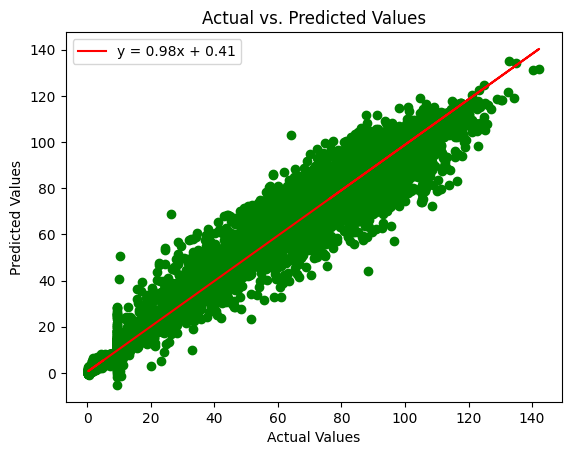

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
plt.scatter(y_test, y_pred,  color='green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Convert y_test and y_pred to 1D arrays
y_test_1d = y_test.values.ravel()
y_pred_1d = y_pred.ravel()

# Calculate the line of best fit
slope, intercept = np.polyfit(y_test_1d, y_pred_1d, 1)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Add the line and its equation to the plot
plt.plot(y_test_1d, slope * y_test_1d + intercept, color='red', label=line_eq)
plt.legend()

plt.show()


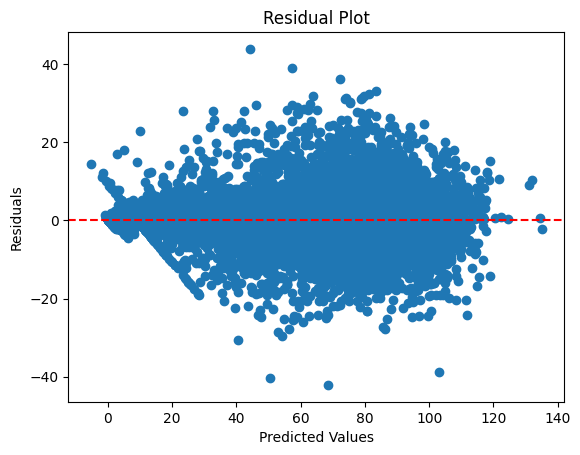

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


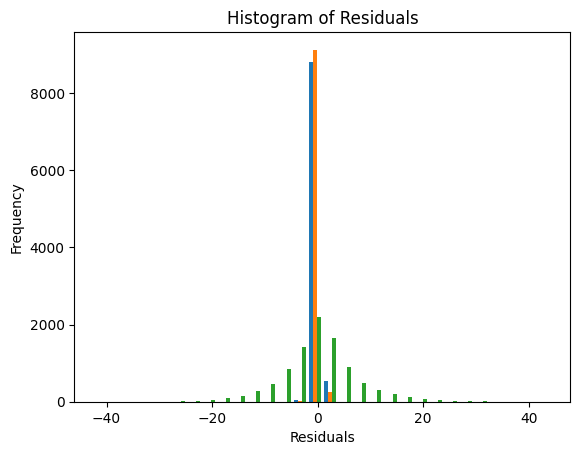

In [ ]:
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


### Apply machine learning model on Sateliite imagery.

In [42]:
import pickle
# Function to calculate the indices using Earth Engine expressions
def calculate_indices(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')

    vhi = image.expression('(B8 - B11) / (B8 + B11)', {
        'B8': image.select('B8'),
        'B11': image.select('B11')
    }).rename('VHI')

    smci = image.expression('(B8 - B12) / (B8 + B12)', {
        'B8': image.select('B8'),
        'B12': image.select('B12')
    }).rename('SMCI')

    evi = image.expression('2.5 * (B8 - B4) / (B8 + 6 * B4 - 7.5 * B2 + 1)', {
        'B8': image.select('B8'),
        'B4': image.select('B4'),
        'B2': image.select('B2')
    }).rename('EVI')

    gndvi = image.normalizedDifference(['B8', 'B3']).rename('GNDVI')

    savi = image.expression('(1 + 0.5) * (B8 - B4) / (B8 + B4 + 0.5)', {
        'B8': image.select('B8'),
        'B4': image.select('B4')
    }).rename('SAVI')

    sr = image.expression('B8 / B4', {
        'B8': image.select('B8'),
        'B4': image.select('B4')
    }).rename('SR')

    edi = image.expression('(B8 - B5) / (B8 + B5)', {
        'B8': image.select('B8'),
        'B5': image.select('B5')
    }).rename('EDI')

    tci = image.expression('(B8 - B6) / (B8 + B6)', {
        'B8': image.select('B8'),
        'B6': image.select('B6')
    }).rename('TCI')


    # Calculate Albedo using custom coefficients
    albedo = image.expression(
        '(0.1324 * B2) + (0.1269 * B3) + (0.1051 * B4) + (0.0971 * B5) + ' +
        '(0.0890 * B6) + (0.0818 * B7) + (0.0722 * B8) + (0.0167 * B11) + ' +
        '(0.0002 * B12)',
        {
            'B2': image.select('B2'),
            'B3': image.select('B3'),
            'B4': image.select('B4'),
            'B5': image.select('B5'),
            'B6': image.select('B6'),
            'B7': image.select('B7'),
            'B8': image.select('B8'),
            'B11': image.select('B11'),
            'B12': image.select('B12')
        }).rename('albedo')


    # LST calculation (in Kelvin)
    lst = image.expression('(Tb / 0.1) - 273.15', {
        'Tb': image.select('B10')  # LST Band (Thermal Infrared)
    }).rename('LST')

    return image.addBands([ndvi, vhi, smci, evi, gndvi, savi, sr, edi, tci, albedo, lst])

# Load the trained machine learning model
model_filename = '/content/drive/MyDrive/GEEMainProject/best_model.pkl'
with open(model_filename, 'rb') as model_file:
    model = pickle.load(model_file)

# Load Sentinel-2 image collection and apply cloud masking
"""At least specify the dates - start and end date over the region of study """

s2_collection = ee.ImageCollection('COPERNICUS/S2').filterDate('2022-08-15', '2023-05-15').filterBounds(cropland).map(maskClouds)

composite = s2_collection.median()

# Calculate the indices using the provided function
composite_with_indices = calculate_indices(composite)


- local wise, per pixel

In [43]:
# Resample composite_with_indices to 250m resolution
resampled_image = composite_with_indices.reproject(
    crs=composite_with_indices.select('B1').projection(),
    scale=250
)

# Select the necessary bands and indices for prediction
image_for_prediction = resampled_image.select([ 'B1','B2', 'B3', 'B4','B5', 'B6', 'B7', 'B8', 'B8A', 'B9','B10', 'B11', 'B12',
                                                      'VHI', 'SMCI', 'EVI', 'GNDVI', 'SAVI', 'SR', 'EDI', 'TCI','albedo', 'LST'])

sampled_image = image_for_prediction.sample(
    region=cropland,  # Define your region of interest here
    scale=250     # Specify the scale (e.g., pixel size)
)

# Get the band names
band_names = image_for_prediction.bandNames().getInfo()

# Define an empty NumPy array to store the data
num_features = len(band_names)
image_array = np.zeros((sampled_image.size().getInfo(), num_features))

# Iterate through the features (locations) and add the band values to the array
features = sampled_image.getInfo()['features']
for i, feature in enumerate(features):
    properties = feature['properties']

    # Add band values to the array
    for j, band_name in enumerate(band_names):
        image_array[i, j] = properties[band_name]


# Make predictions using the loaded model
predictions = model.predict(image_array)
#
# Make predictions using the loaded model
predictions = model.predict(image_array)

# Convert predictions to an Earth Engine Image
classified_image = ee.Image.constant(predictions).rename(['CWP', 'Yield', 'ETa'])


In [45]:
import pandas as pd

# Define the output CSV file path
output_csv_path = '/content/drive/MyDrive/GEEMainProject/Predictions/Bura_Current_pred.csv'

# Define the labels for the columns
labels = ['CWP', 'Yield', 'ETa']

# Create a DataFrame to store predictions with appropriate column names
predictions_df = pd.DataFrame(predictions, columns=labels)

# Write the predictions to a CSV file
predictions_df.to_csv(output_csv_path, index=False)

# Provide a summary
print(f'Predictions have been saved to {output_csv_path} with the following columns: {", ".join(labels)}')

#summary

print(predictions_df.head())
print(predictions_df.describe())




Predictions have been saved to /content/drive/MyDrive/GEEMainProject/Predictions/Bura_Current_pred.csv with the following columns: CWP, Yield, ETa
        CWP     Yield        ETa
0  5.539852  3.604607  64.644234
1  6.090943  2.551669  41.997368
2  6.144939  2.889961  51.784149
3  5.729486  3.574998  52.351120
4  5.261792  3.526199  59.398586
               CWP        Yield          ETa
count  1733.000000  1733.000000  1733.000000
mean      5.803307     3.273922    59.254959
std       0.253660     0.496110    12.780770
min       5.153540     1.031810    14.895850
25%       5.611849     3.053968    50.195816
50%       5.772072     3.319179    57.332390
75%       5.956688     3.649605    69.033226
max       6.970898     4.547032    91.989082


# Map View area

In [ ]:
Map.add_layer_control()
Map.centerObject(cropland)
Map

# Testing section